In [136]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import DataClass as dc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import Regression
from importlib import reload

reload(Regression)

myRegression = Regression.Regression()

# Passo 1: Carregar os datasets e converter os valores não numéricos para valores numéricos
dt2 = pd.read_csv(dc.CSV_PATH_2)
dt5 = pd.read_csv(dc.CSV_PATH_5)
dt7 = pd.read_csv(dc.CSV_PATH_7)

dt = pd.concat([dt2, dt5, dt7], ignore_index=True)
bdt=pd.concat([dt2, dt5, dt7], ignore_index=True)

pd.set_option('display.max_columns', None)

# Identificar colunas não numéricas
non_numeric_columns = dt.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Converter colunas não numéricas para valores numéricos
for column in non_numeric_columns:
    dt[column] = label_encoder.fit_transform(dt[column])

print(dt.head())
print(bdt.head())

      Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0  14537      3166                198      6                           192   
1   1154      2877                342     13                           450   
2  14507      3103                 48      7                             0   
3   7196      2950                269     39                           450   
4   1801      2868                332     17                            60   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                          -4                             3137   
1                         131                              618   
2                           0                             1034   
3                         316                             1528   
4                          23                             1718   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0              218               245               163   
1              193

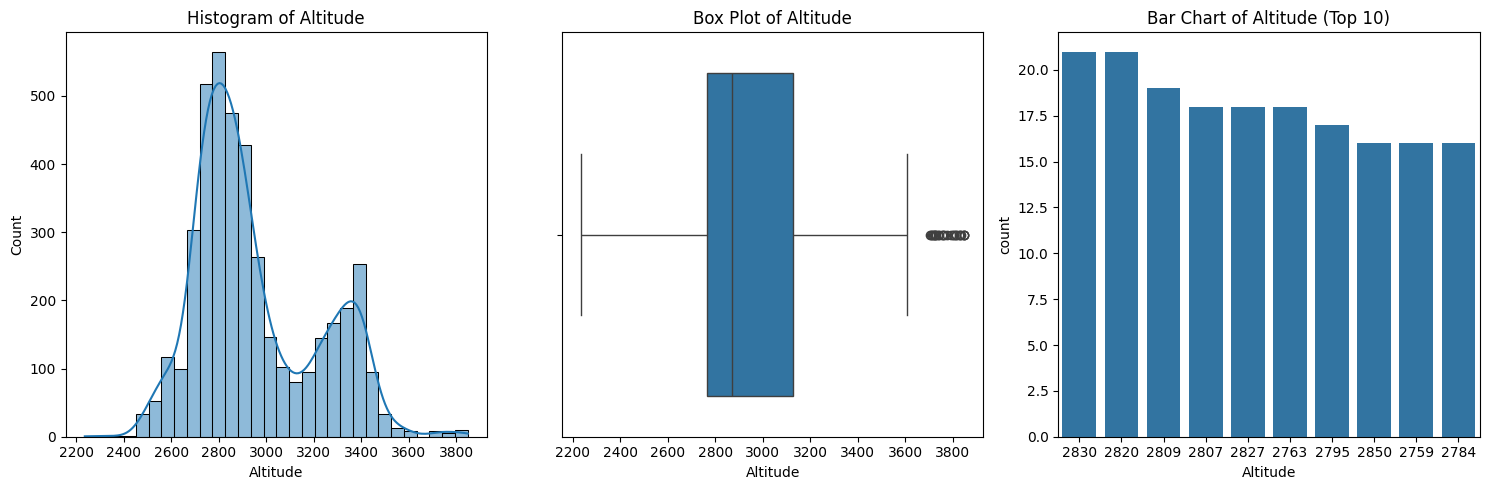

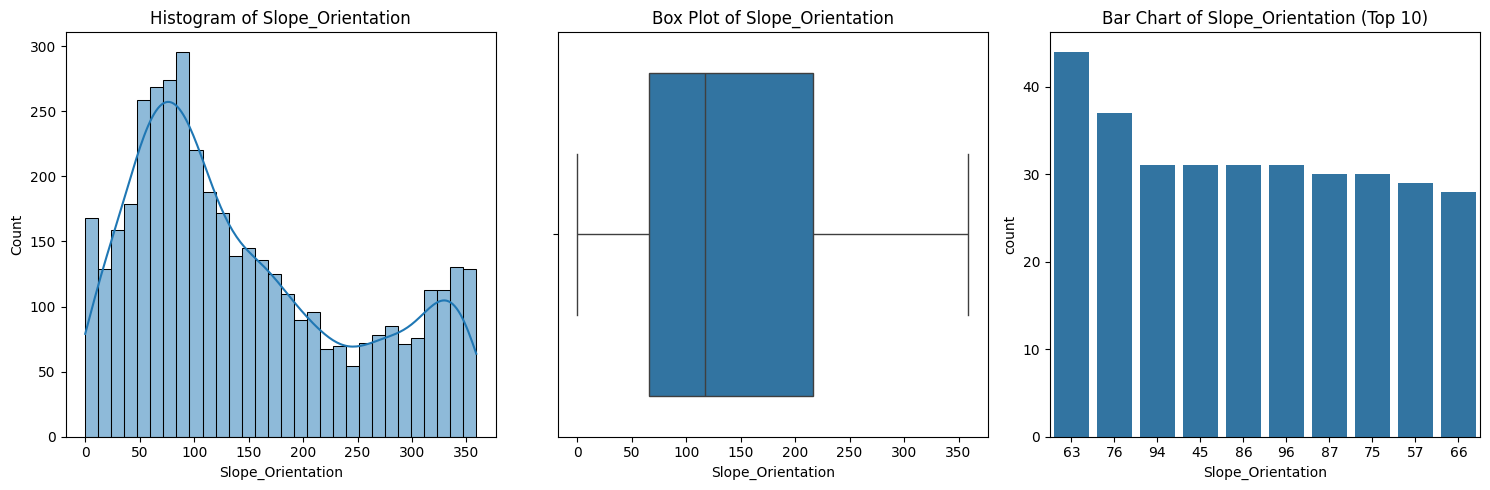

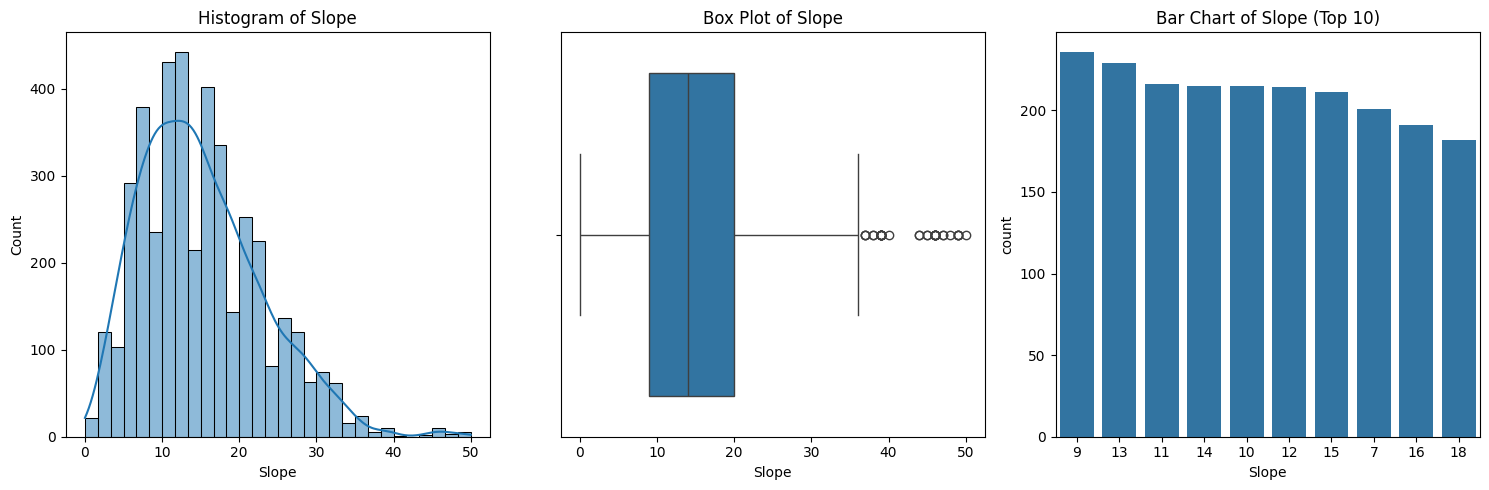

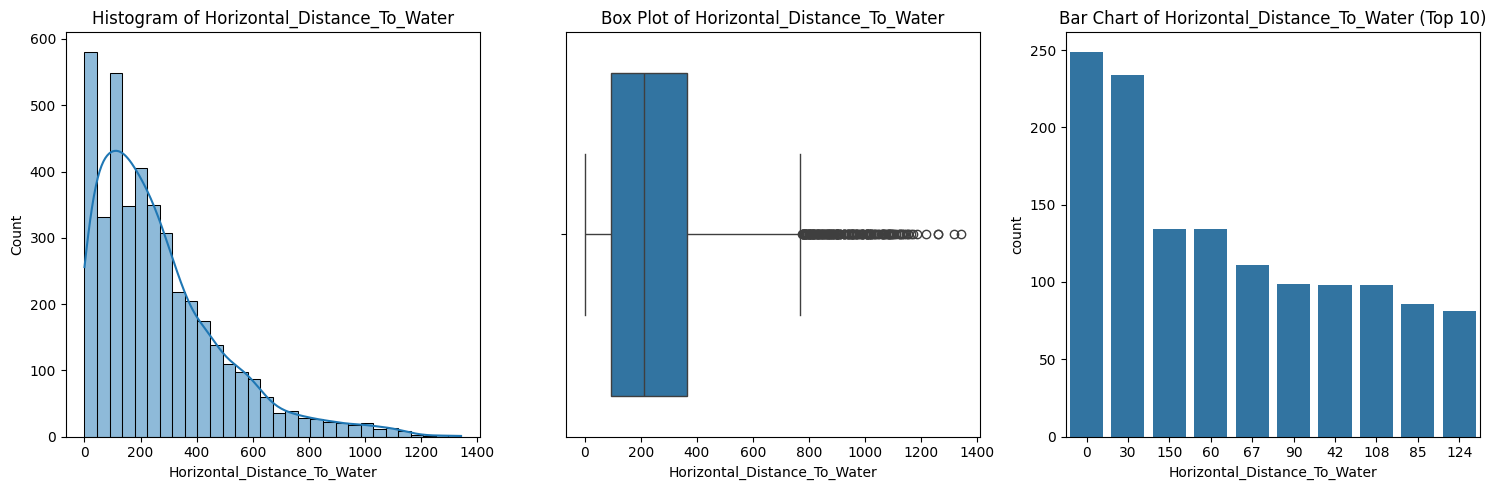

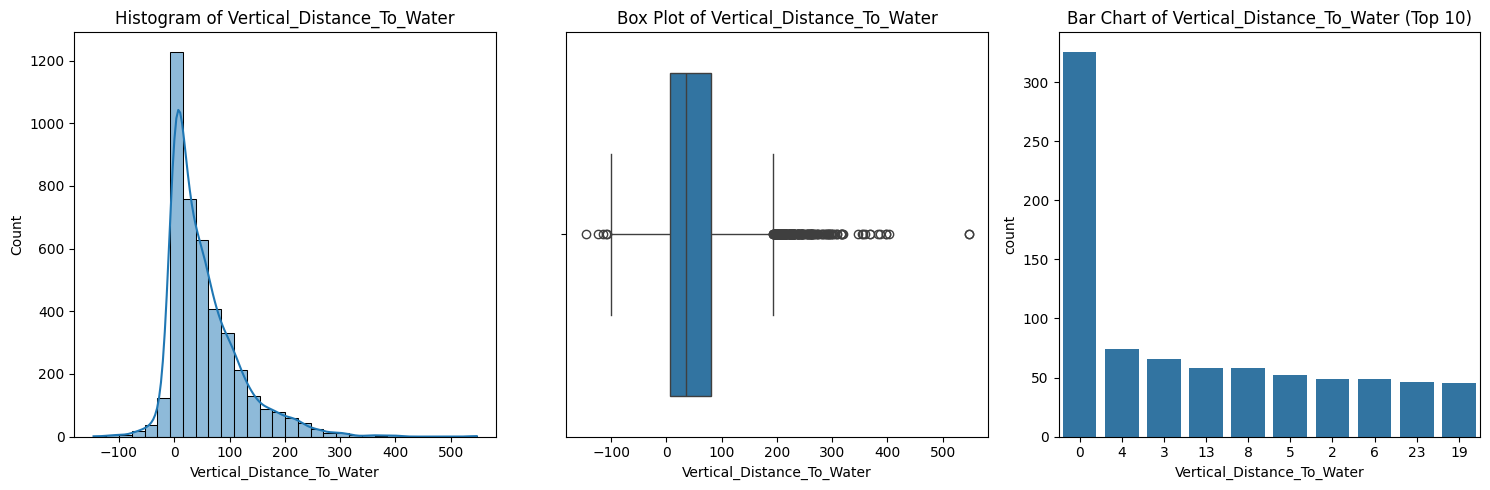

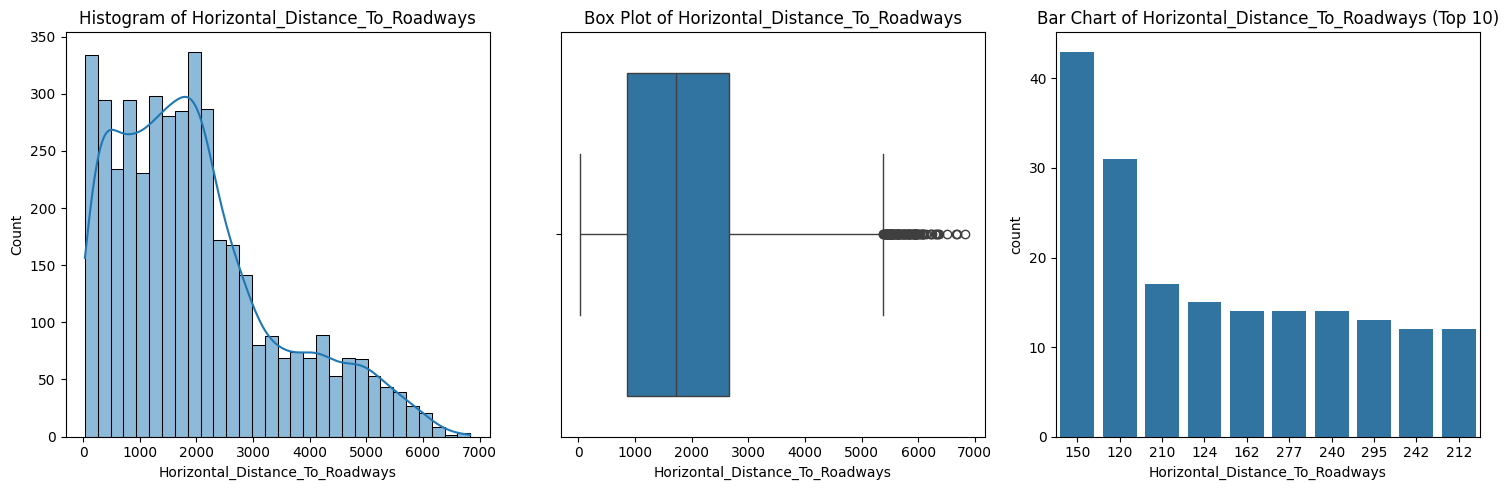

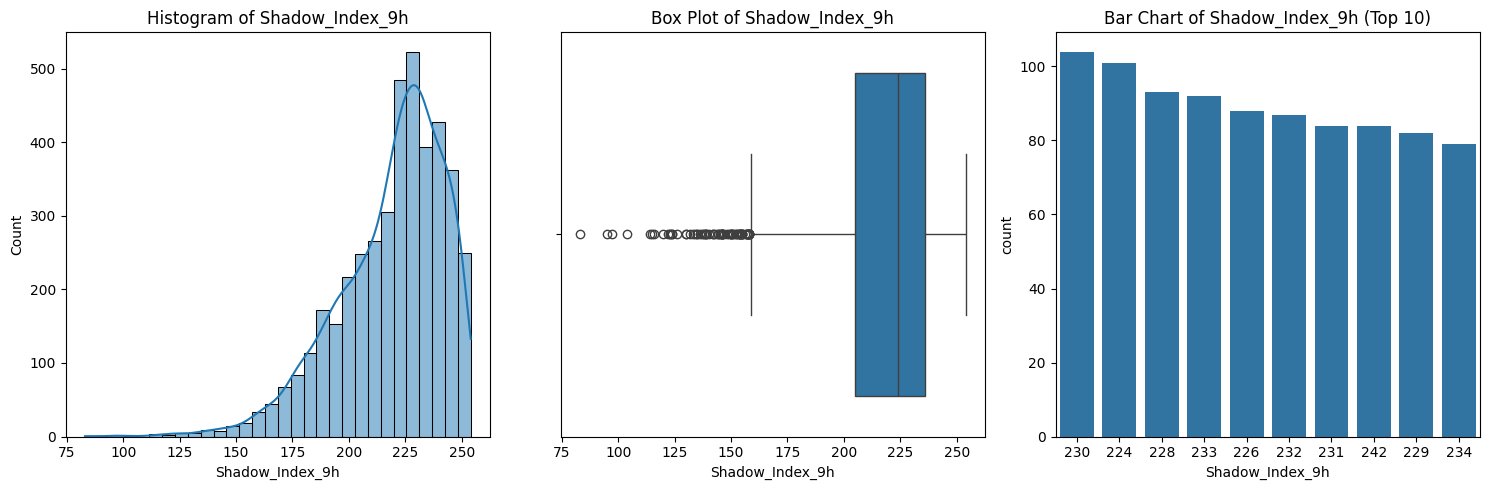

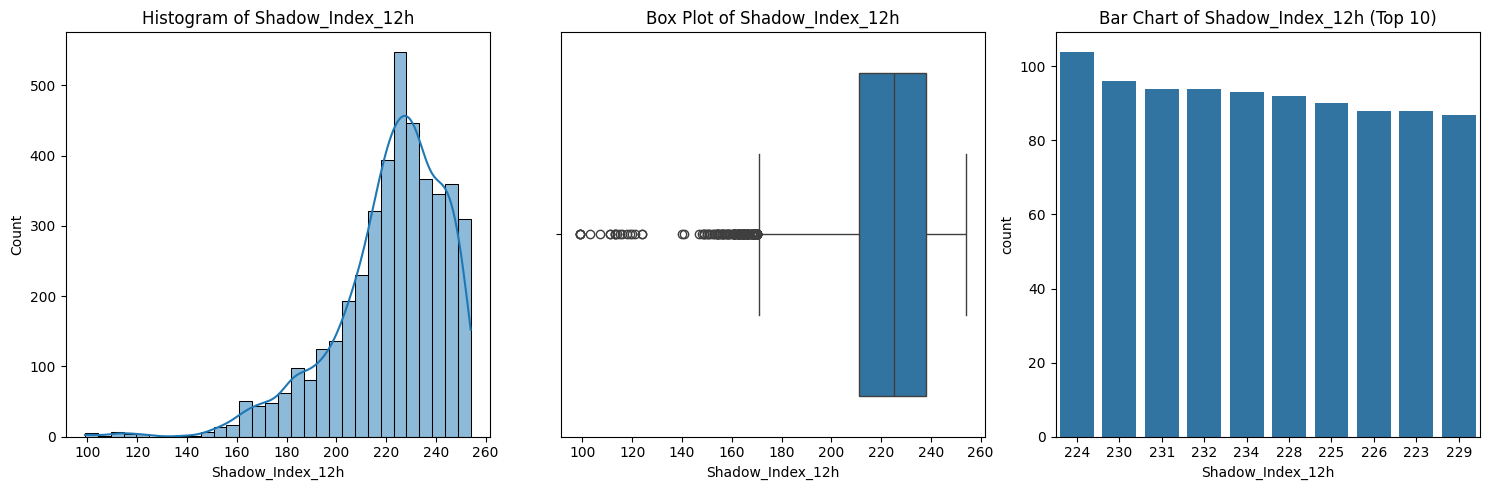

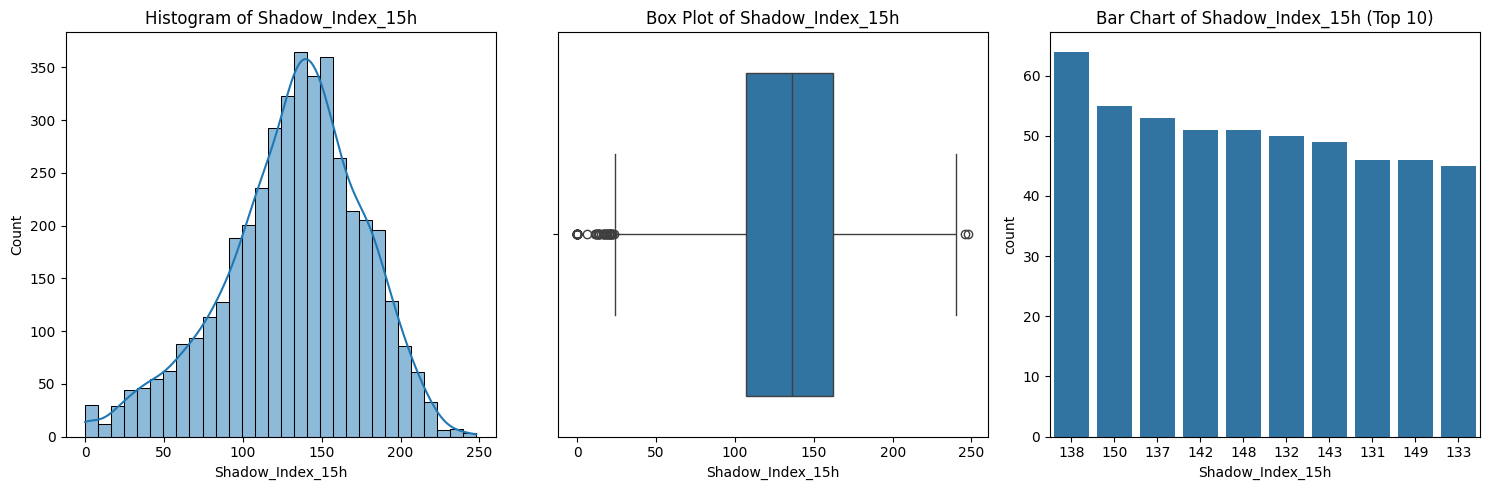

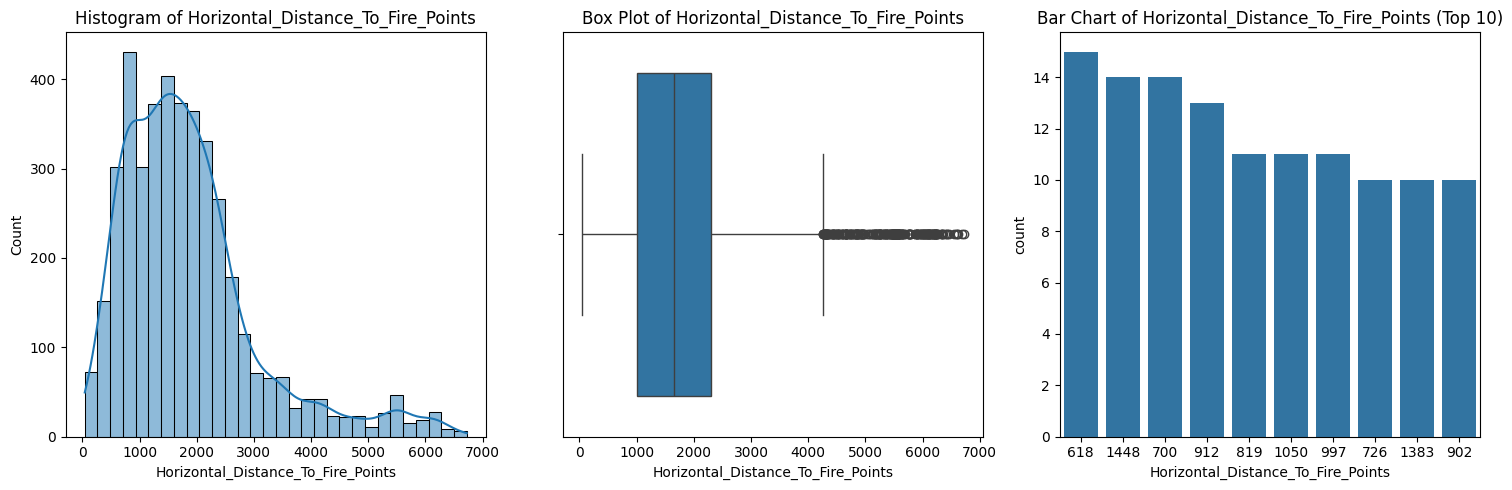

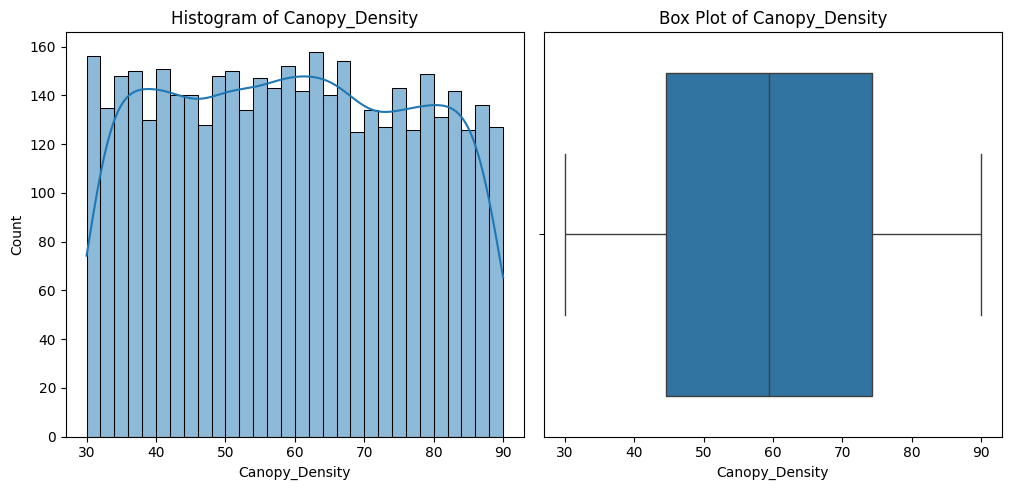

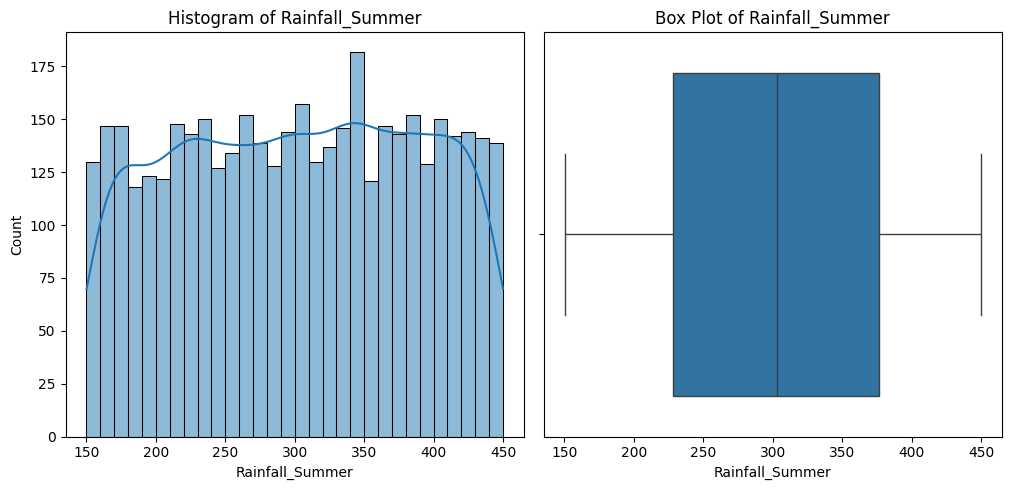

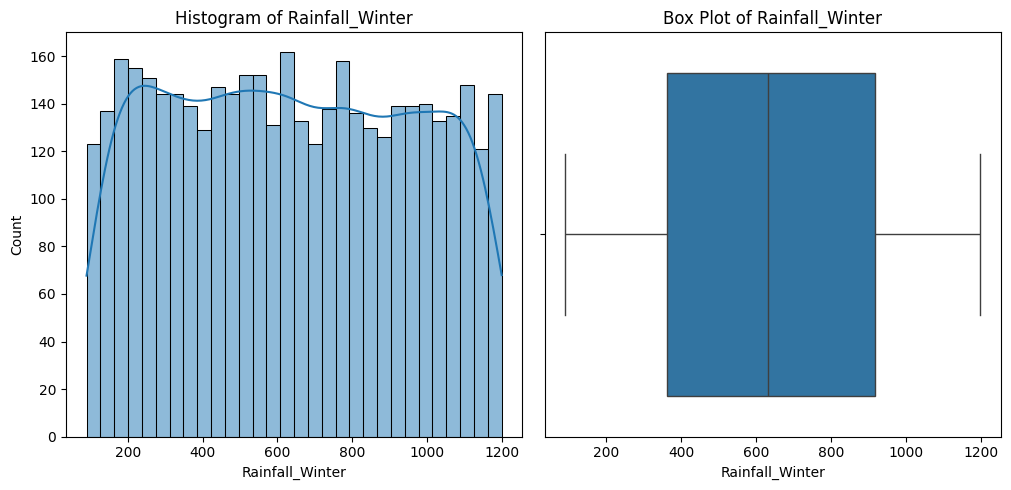

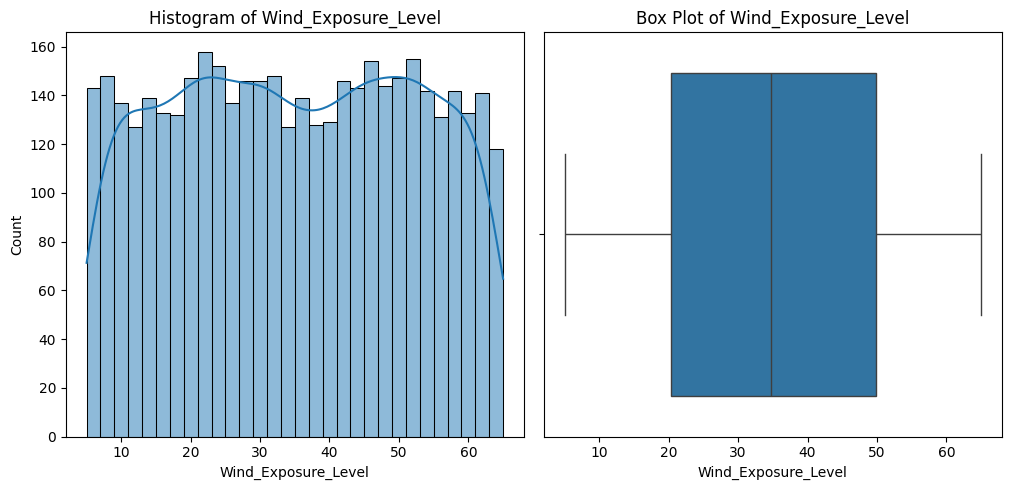

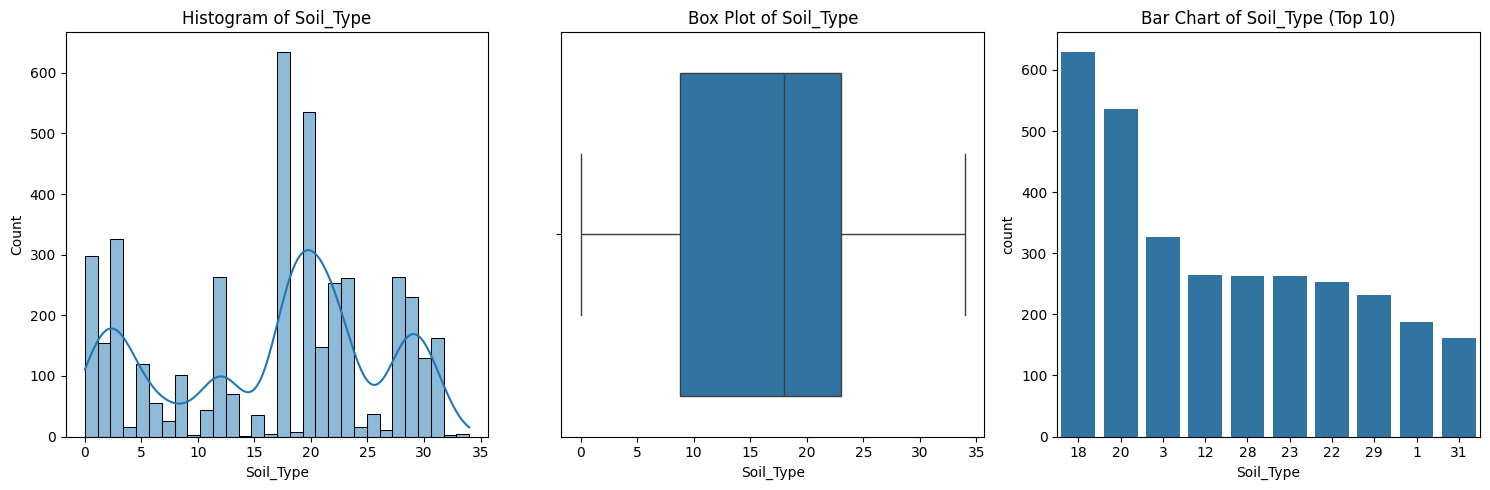

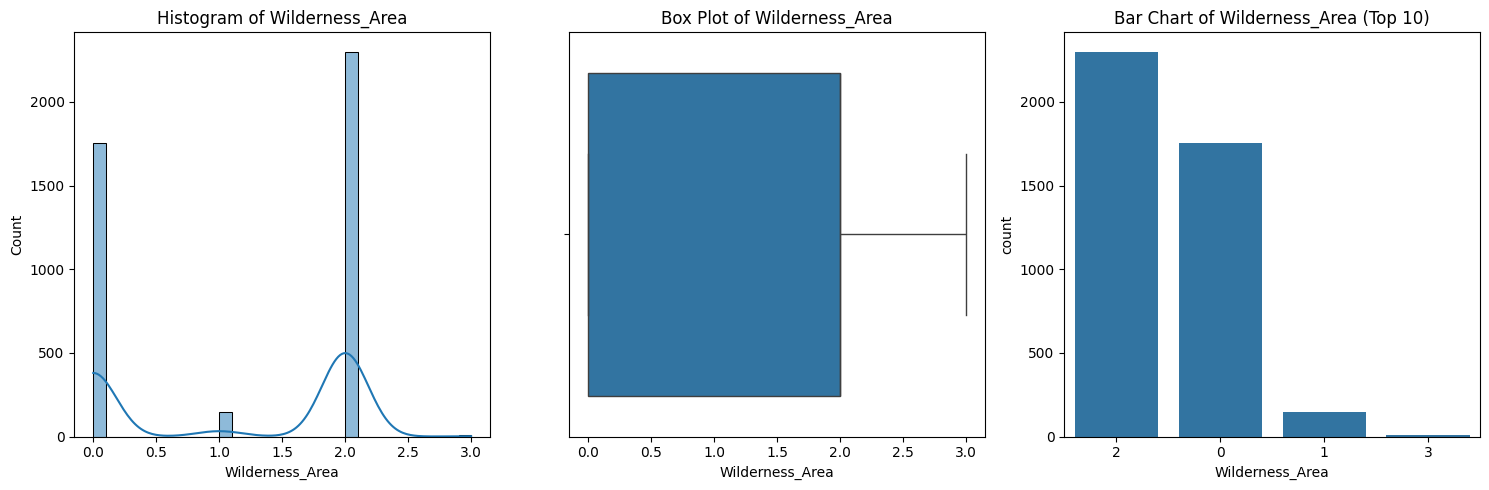

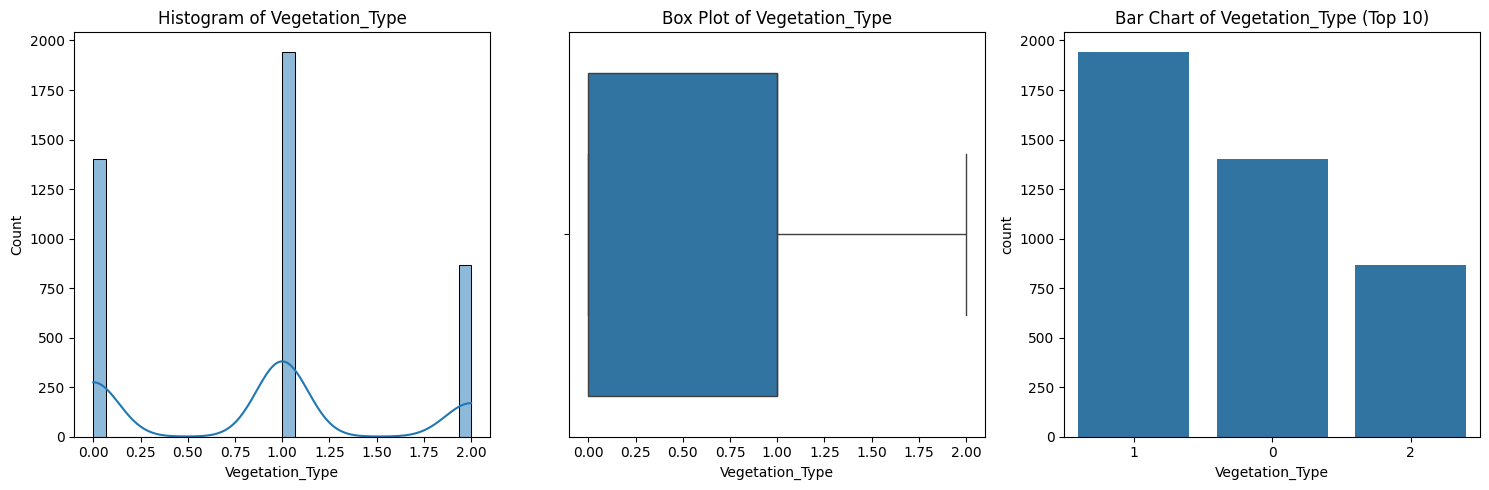

In [50]:
# Passo 2: Univariate Analysis (Distribution of individual features)
def univariate_analysis(data, column_name):
    # with open(f'univariate_analysis/univariate_analysis_{column_name}.txt', 'w') as file:
    #     file.write(f'Univariate Analysis for {column_name}\n')
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()
    mode_value = data[column_name].mode()[0]
    std_dev_value = data[column_name].std()
    range_value = data[column_name].max() - data[column_name].min()
    variance_value = data[column_name].var()
    iqr_value = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    skewness_value = data[column_name].skew()
    kurtosis_value = data[column_name].kurtosis()

    # Frequency Distribution (top 10)
    frequency_distribution = data[column_name].value_counts().head(10)
    # file.write('Frequency Distribution (Top 10):\n')
    # file.write(f'{frequency_distribution}\n\n')

    # Central Tendency
    # file.write(f'Mean: {mean_value}\n')
    # file.write(f'Median: {median_value}\n')
    # file.write(f'Mode: {mode_value}\n\n')

    # Variability
    # file.write(f'Standard Deviation: {std_dev_value}\n')
    # file.write(f'Range: {range_value}\n')
    # file.write(f'Variance: {variance_value}\n')
    # file.write(f'IQR: {iqr_value}\n\n')

    # Skewness and Kurtosis
    # file.write(f'Skewness: {skewness_value}\n')
    # file.write(f'Kurtosis: {kurtosis_value}\n\n')

    # Visualization
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], kde=True, bins=30)
    plt.title(f'Histogram of {column_name}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')

    # Bar Chart (for categorical features)
    if data[column_name].dtype == 'int' or data[column_name].dtype == 'object':
        plt.subplot(1, 3, 3)
        sns.countplot(x=data[column_name], order=data[column_name].value_counts().index[:10])
        plt.title(f'Bar Chart of {column_name} (Top 10)')

    plt.tight_layout()
    # plt.savefig(f'univariate_analysis/univariate_analysis_{column_name}.png')
    plt.show()

variables_to_analyze = [
    dc.ALTITUDE,
    dc.SLOPE_ORIENTATION,
    dc.SLOPE,
    dc.HORIZONTAL_DISTANCE_TO_WATER,
    dc.VERTICAL_DISTANCE_TO_WATER,
    dc.HORIZONTAL_DISTANCE_TO_ROADWAYS,
    dc.SHADOW_INDEX_9,
    dc.SHADOW_INDEX_12,
    dc.SHADOW_INDEX_15,
    dc.HORIZONTAL_DISTANCE_TO_FIRE_POINTS,
    dc.CANOPY_DENSITY,
    dc.RAINFALL_SUMMER,
    dc.RAINFALL_WINTER,
    dc.WIND_EXPOSURE_LEVEL,
    dc.SOIL_TYPE,
    dc.WILDERNESS_AREA,
    dc.VEGETATION_TYPE
]

# Realizar a análise univariada para cada variável
for variable in variables_to_analyze:
    univariate_analysis(dt, variable)

# # Conclusões da Análise Univariada
# conclusions = """
# Conclusões da Análise Univariada:

# 1. A variável 'Altitude' apresenta uma média de 2948, com uma ligeira assimetria positiva (skewness = 0.74). Isto sugere que a maior parte dos valores está concentrada em altitudes mais baixas, com alguns valores mais altos a puxar a média para cima.

# 2. A variável 'Slope_Orientation' também tem uma distribuição assimétrica positiva (skewness = 0.62), indicando que a maioria das orientações de encosta estão em valores mais baixos, com alguns valores mais altos a causar uma cauda longa.

# 3. A variável 'Slope' tem uma moda de 9, indicando que esta inclinação é a mais comum. A assimetria positiva (skewness = 0.77) sugere que a maioria dos valores está abaixo da média, com algumas inclinações mais íngremes.

# 4. A 'Horizontal_Distance_To_Water' apresenta um valor de skewness de 1.38, sugerindo uma distribuição altamente assimétrica positiva. Muitos pontos estão próximos de corpos de água, mas há alguns que estão significativamente mais distantes.

# 5. A 'Vertical_Distance_To_Water' mostra uma assimetria ainda mais pronunciada (skewness = 1.64), indicando que a maioria dos pontos está próxima da água verticalmente, mas alguns têm uma grande distância.

# 6. A 'Horizontal_Distance_To_Roadways' tem uma média elevada (1974) e uma assimetria positiva (skewness = 0.90), sugerindo que a maioria dos pontos está relativamente próxima das estradas, com alguns outliers mais distantes.

# 7. As variáveis 'Shadow_Index_9h', 'Shadow_Index_12h' e 'Shadow_Index_15h' apresentam assimetrias negativas, sugerindo que os valores mais elevados são mais comuns. Isto indica que a maioria das áreas tem uma boa cobertura de sombra durante essas horas.

# 8. A variável 'Horizontal_Distance_To_Fire_Points' apresenta uma distribuição altamente assimétrica positiva (skewness = 1.48), sugerindo que a maioria dos pontos está relativamente próxima de pontos de incêndio, mas há alguns pontos significativamente distantes.

# 9. A 'Canopy_Density' tem uma distribuição relativamente simétrica (skewness = 0.03), indicando uma distribuição equilibrada da densidade de copas.

# 10. As variáveis 'Rainfall_Summer' e 'Rainfall_Winter' apresentam kurtosis negativa, indicando que os dados são menos concentrados em torno da média, com caudas mais pesadas.

# 11. A 'Wilderness_Area' é dominada por dois valores (0 e 2), indicando que a maioria dos pontos pertence a essas duas categorias.

# 12. A 'Vegetation_Type' mostra que a categoria 1 é a mais comum, seguida pela categoria 0, indicando uma predominância desses tipos de vegetação.
# """

# with open('univariate_analysis/univariate_analysis_conclusions.txt', 'w') as file:
#     file.write(conclusions)

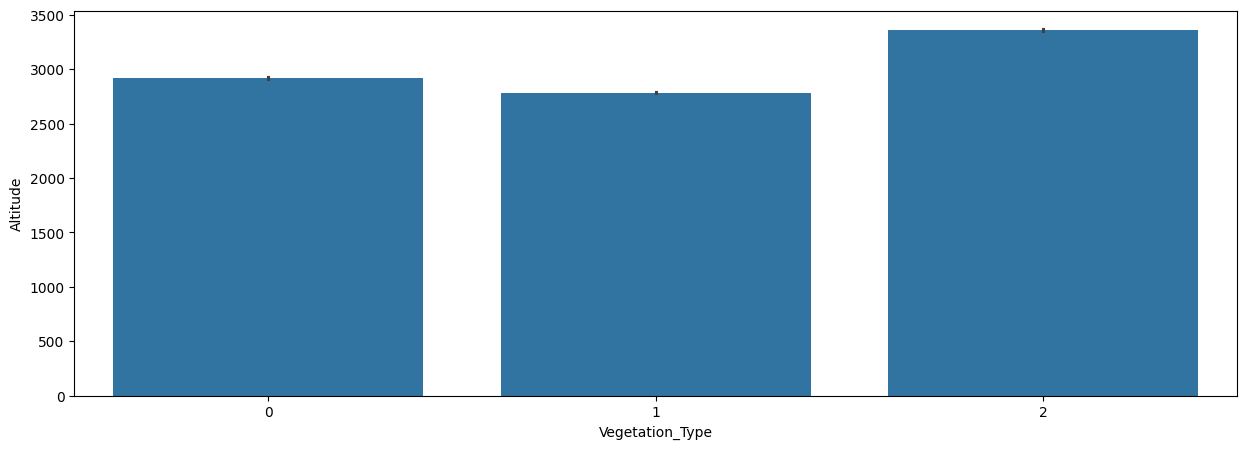

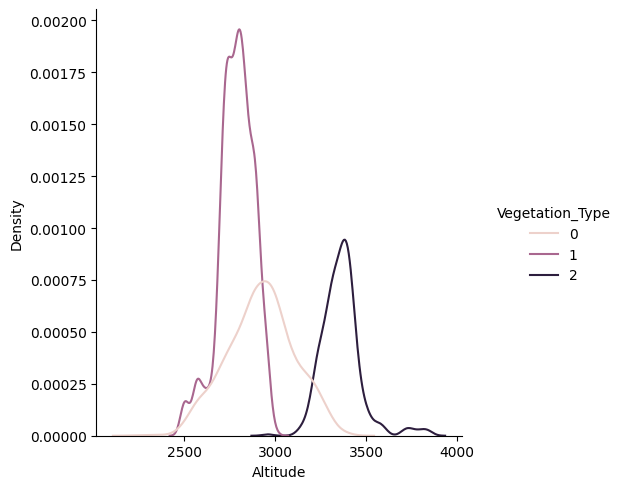

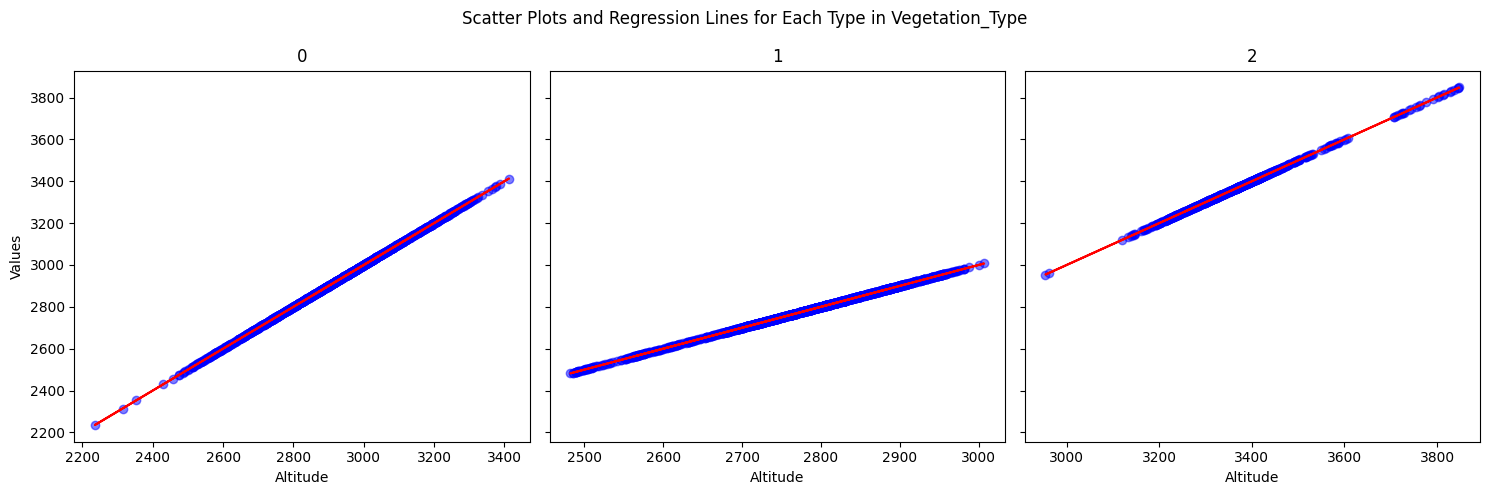

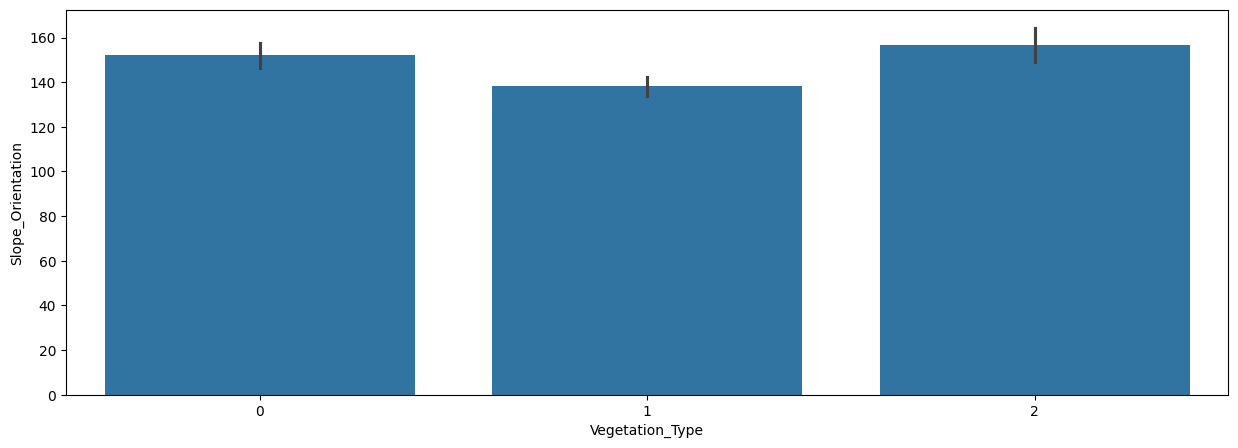

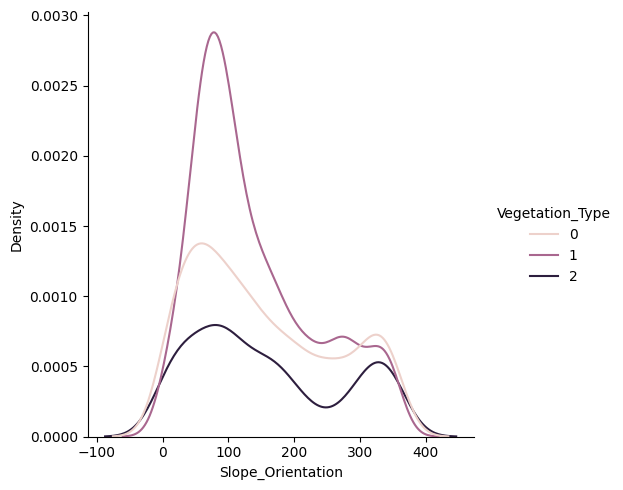

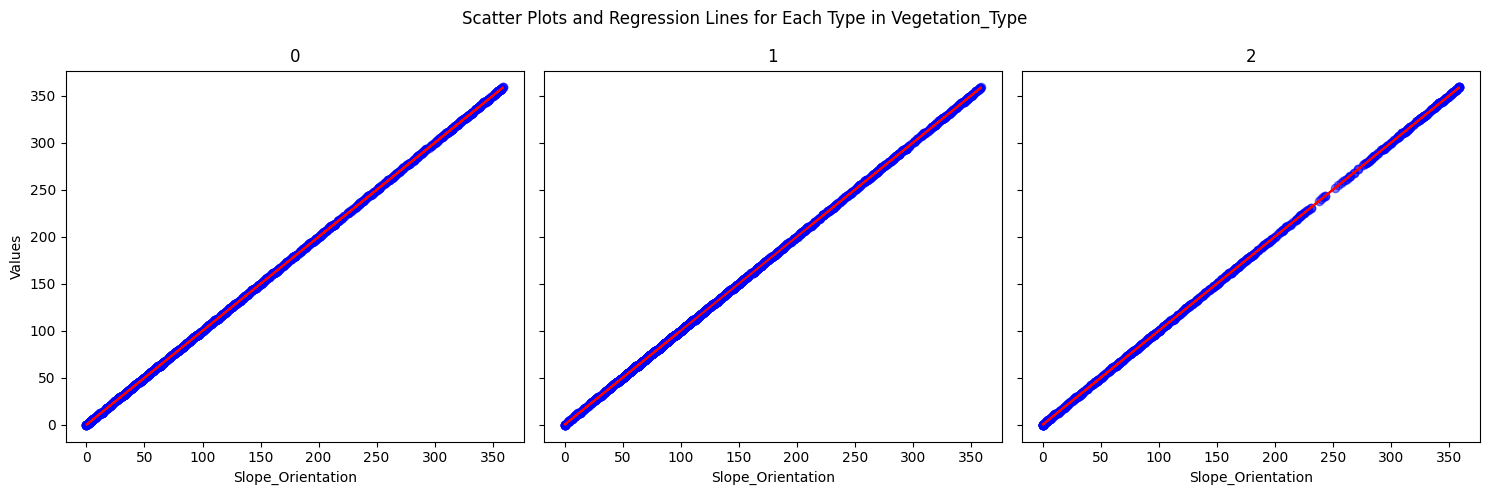

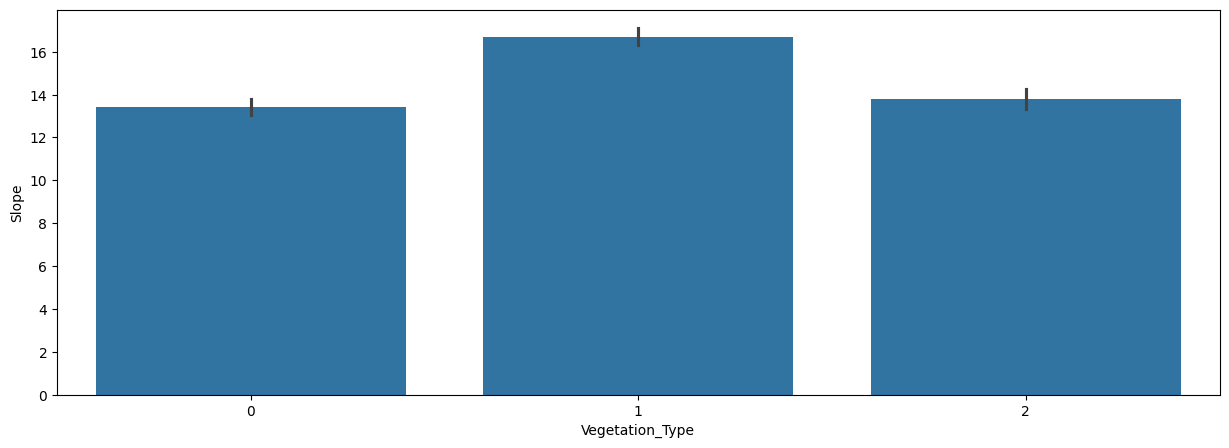

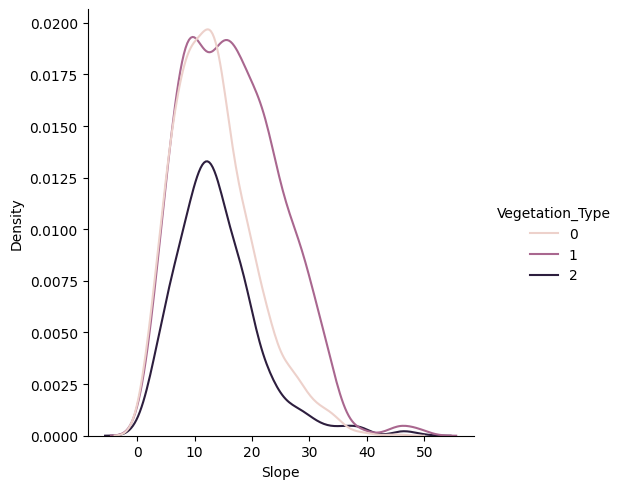

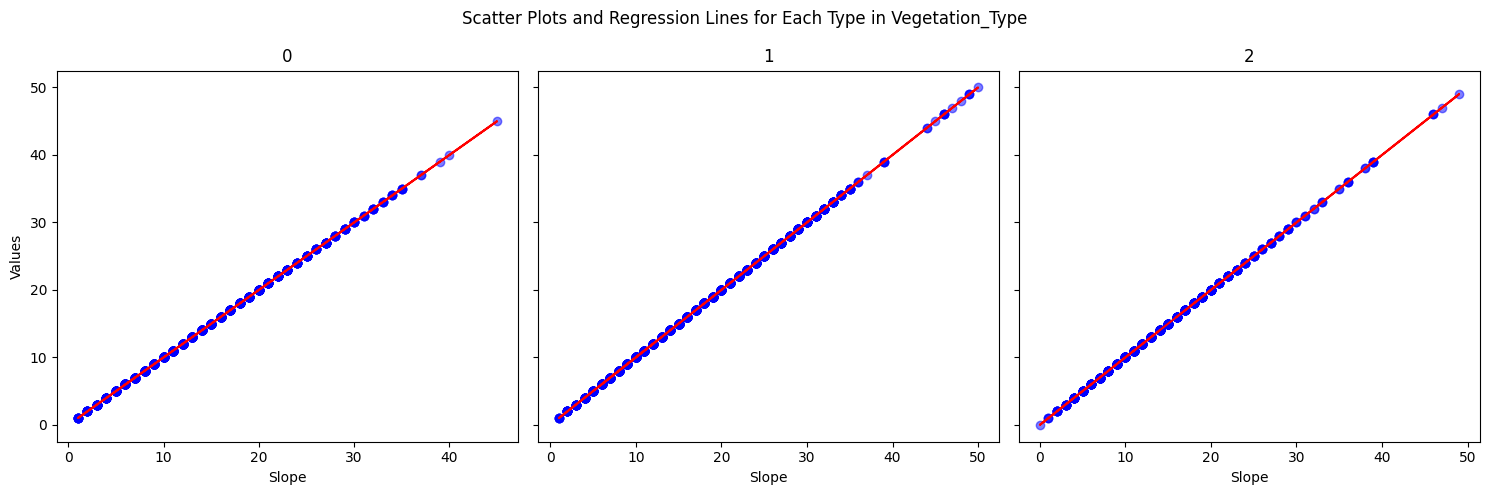

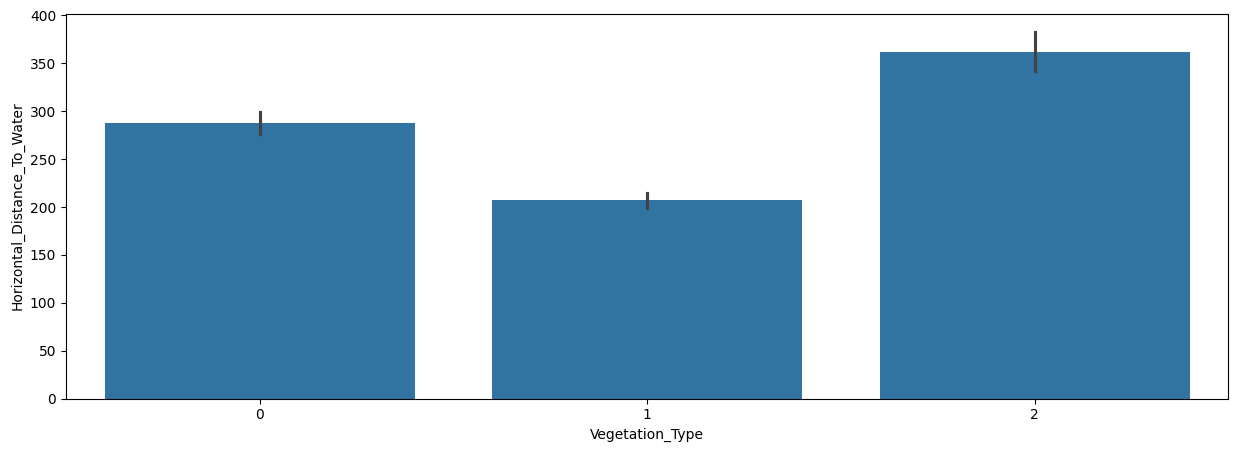

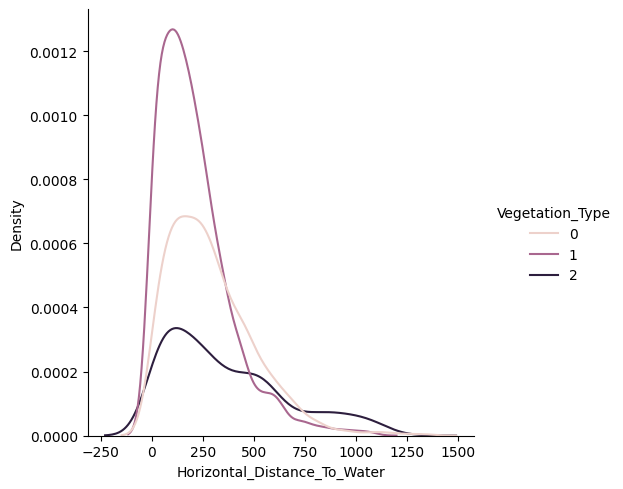

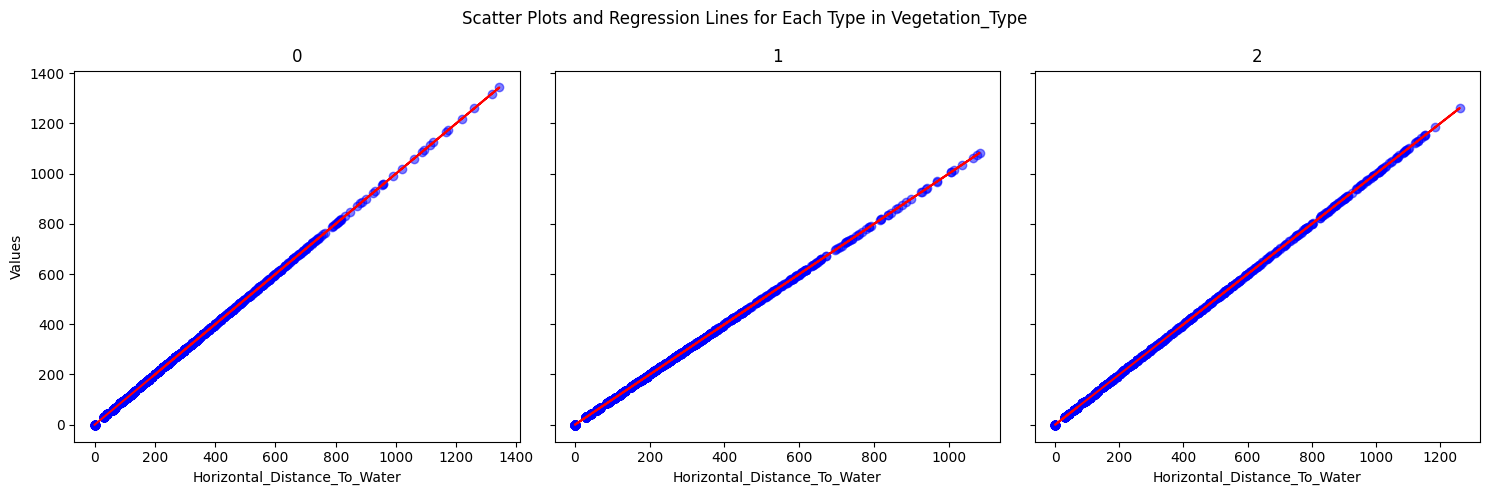

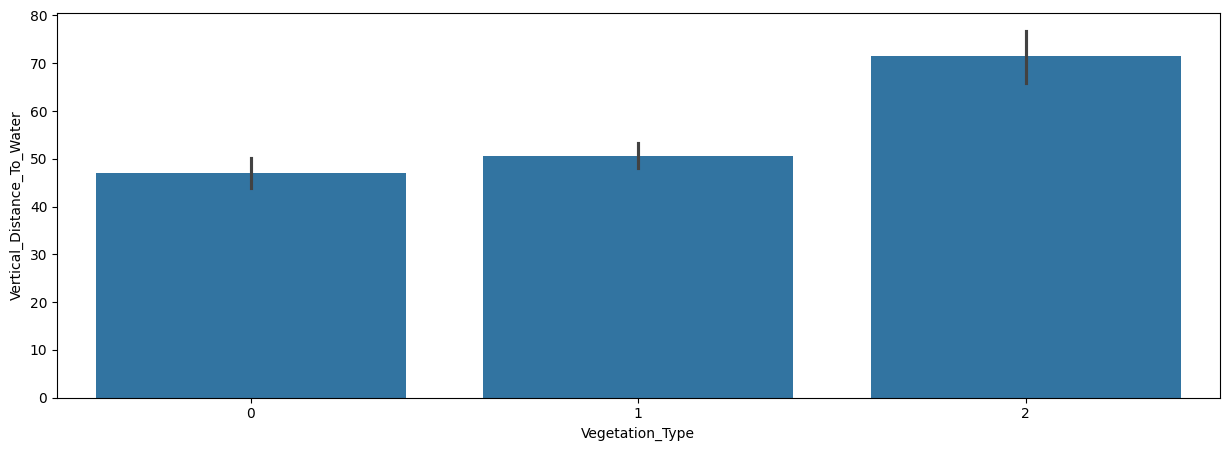

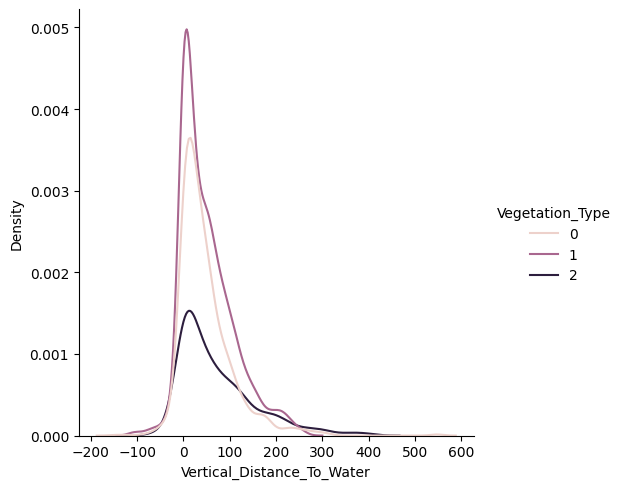

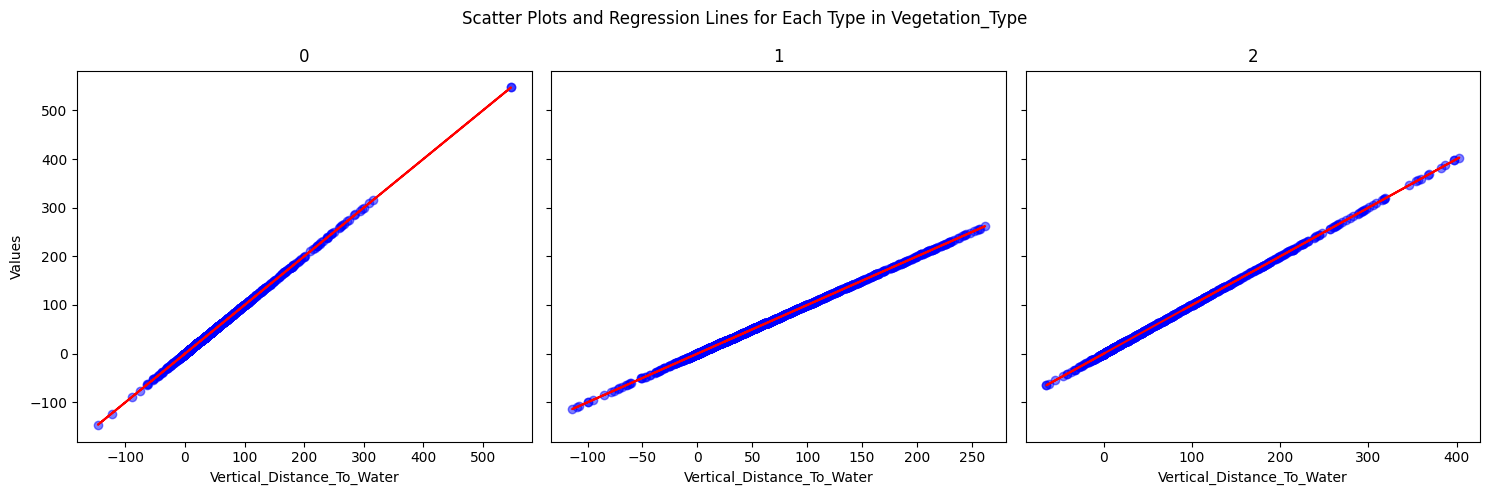

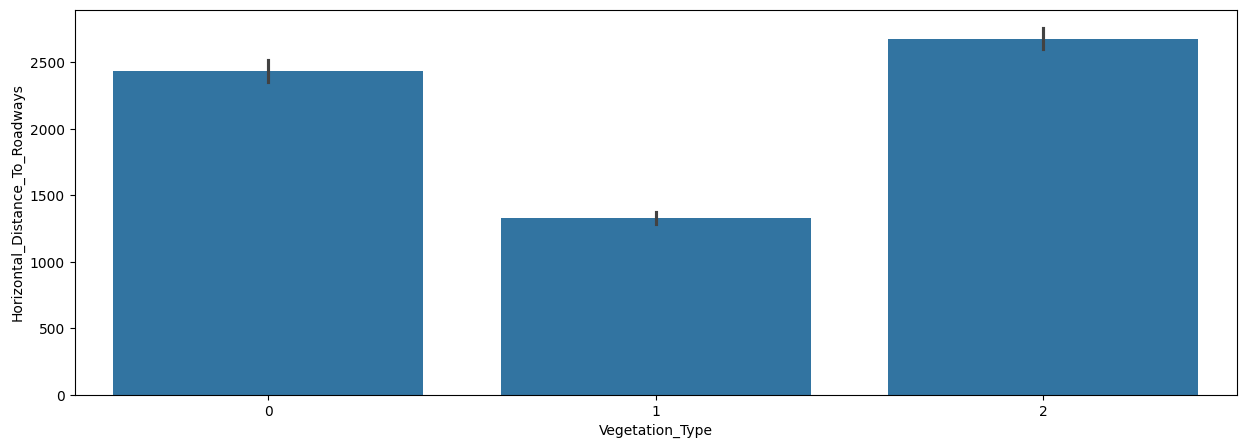

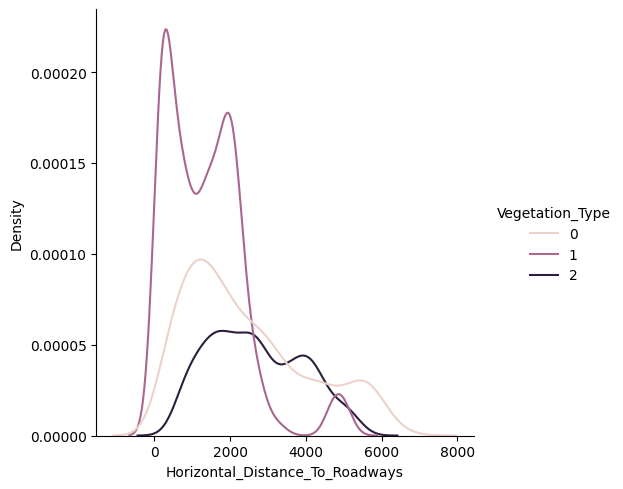

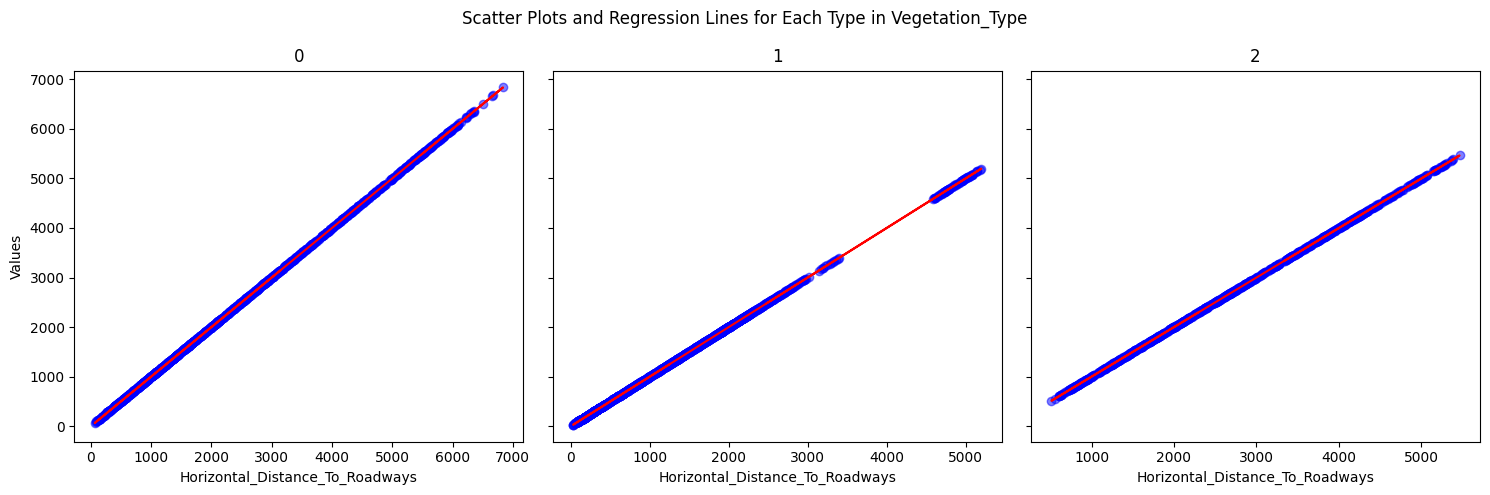

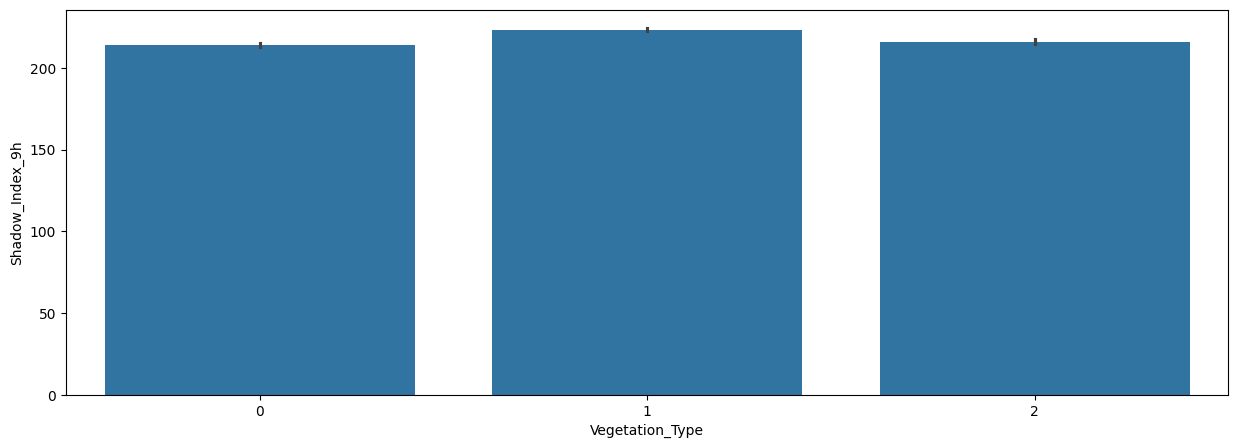

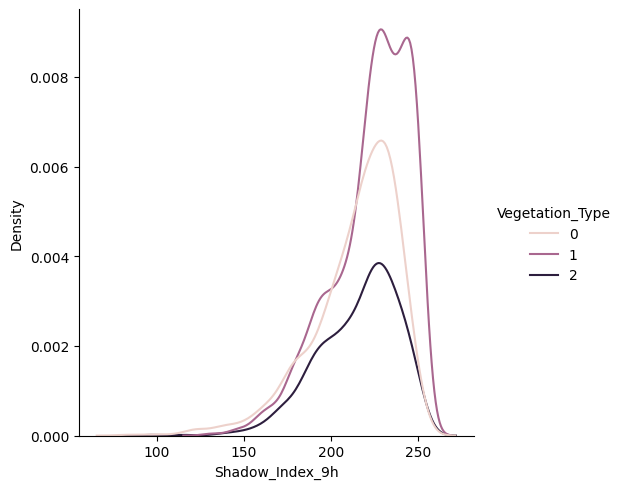

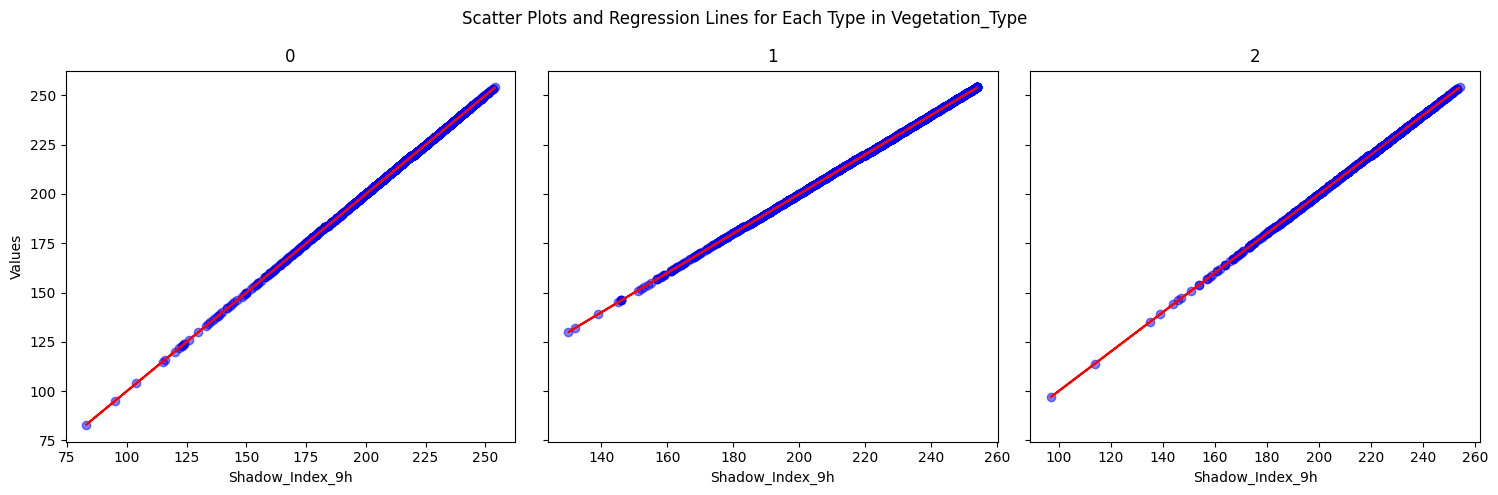

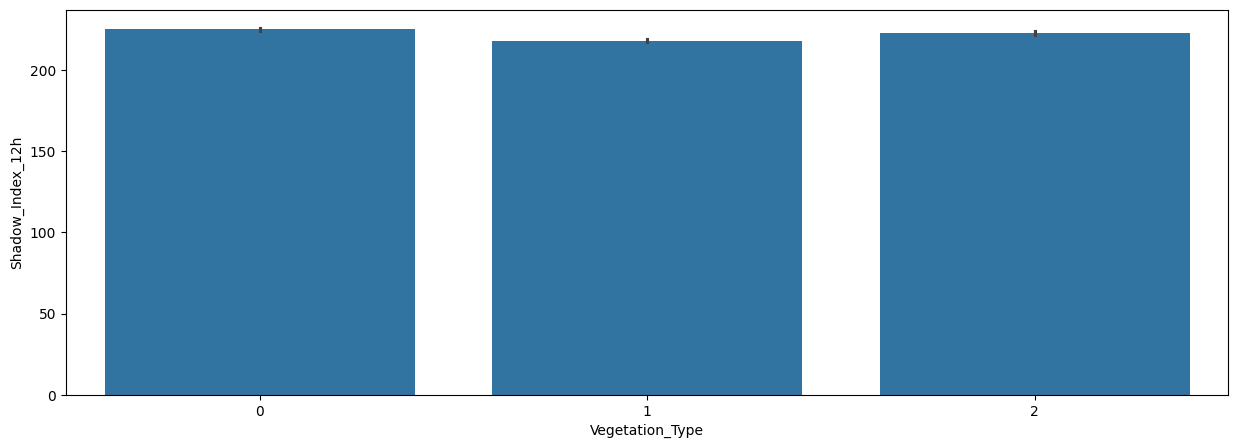

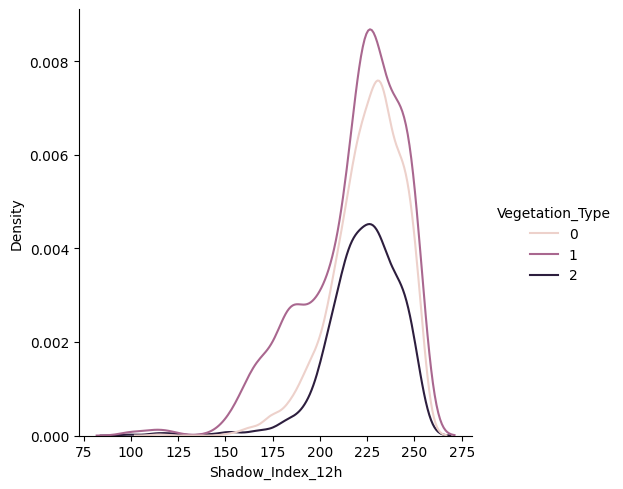

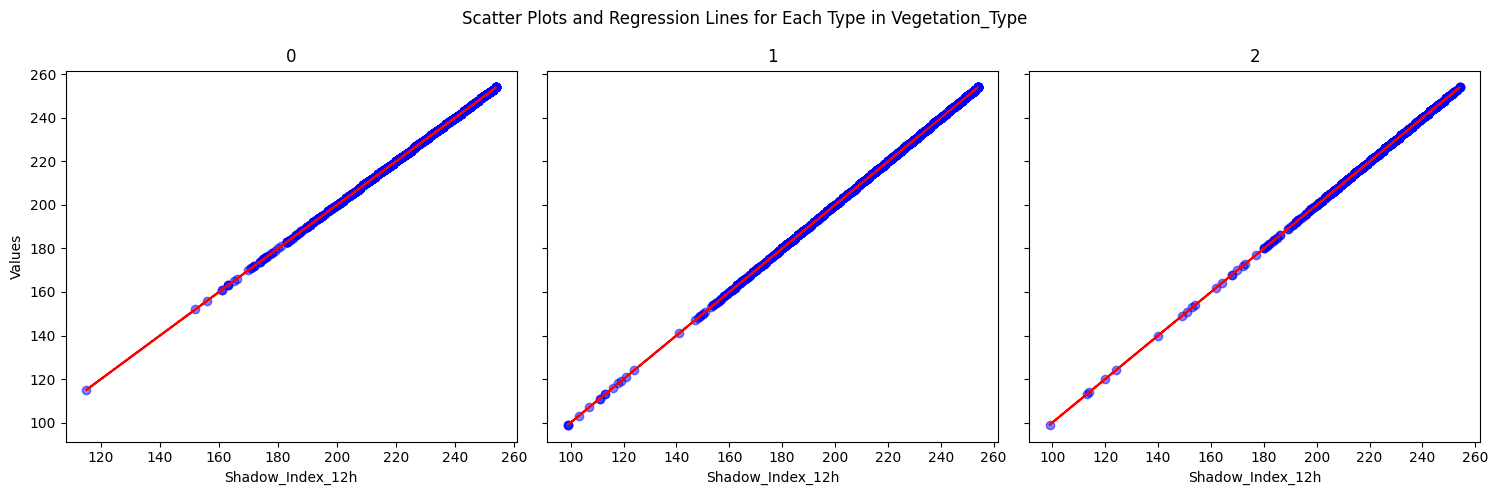

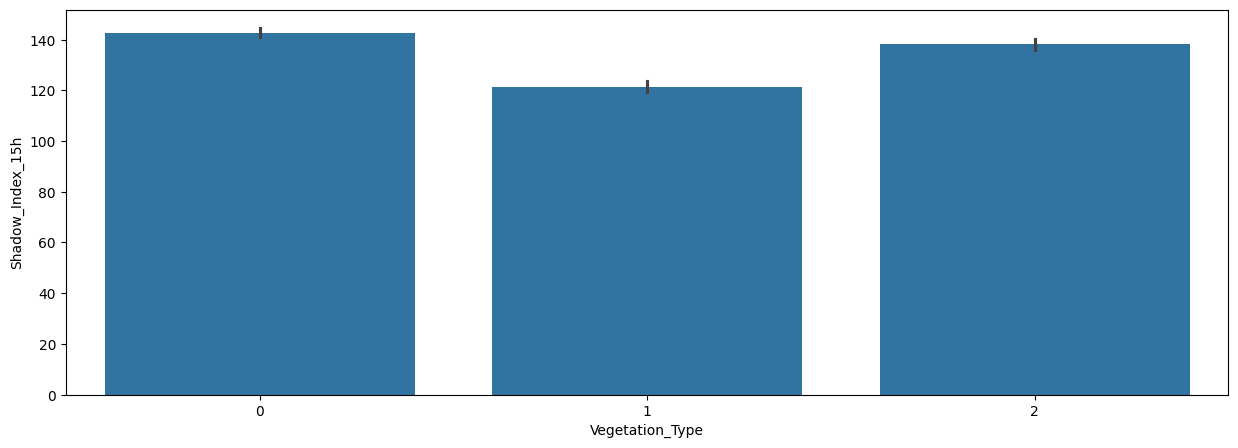

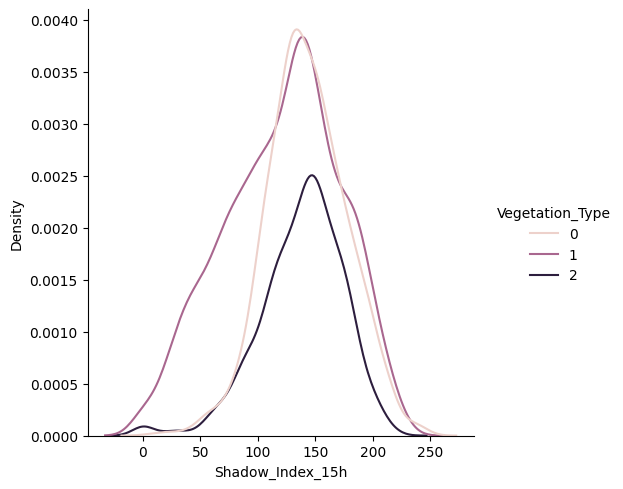

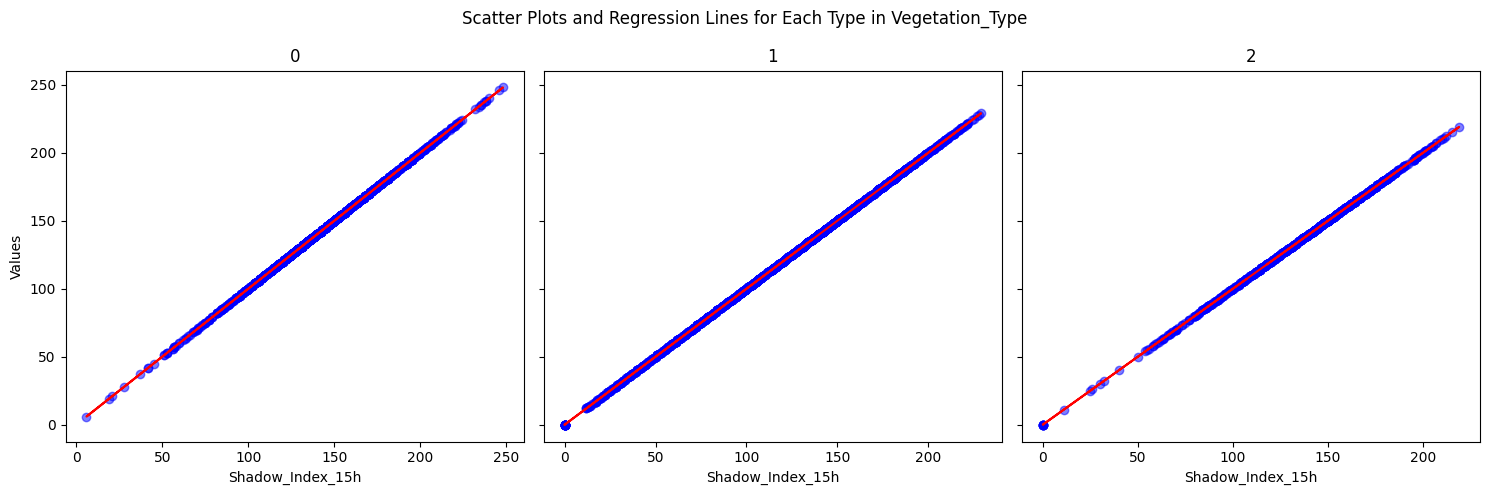

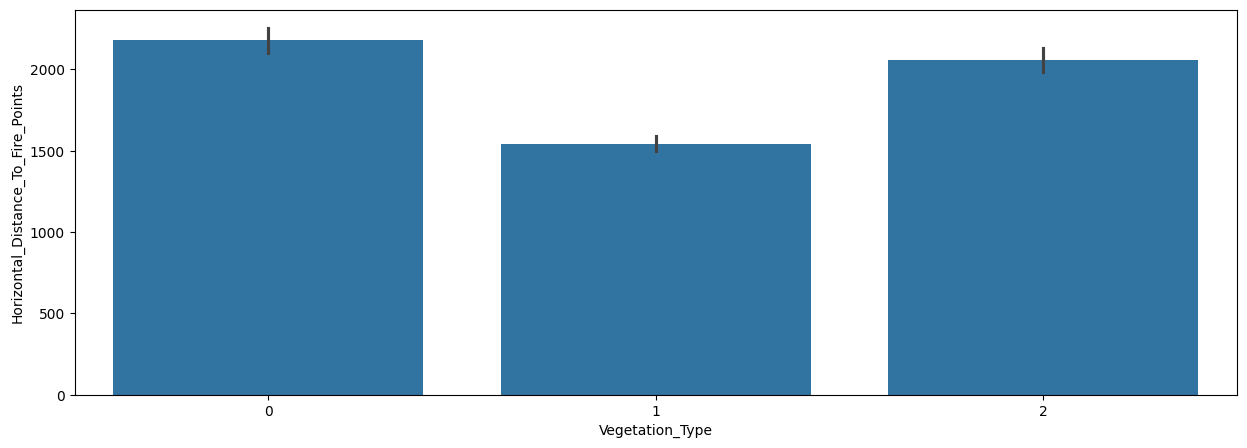

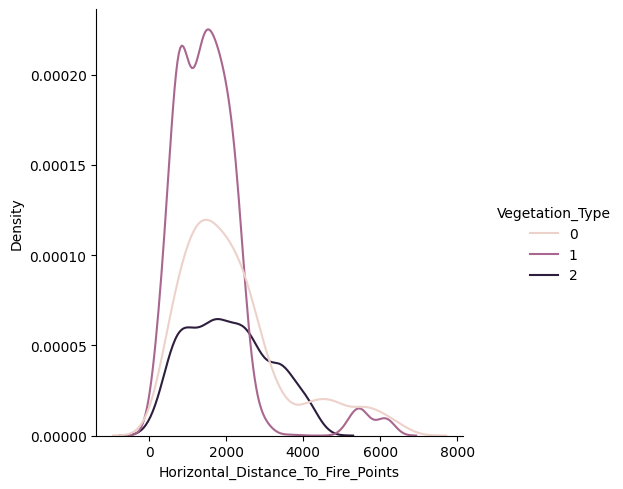

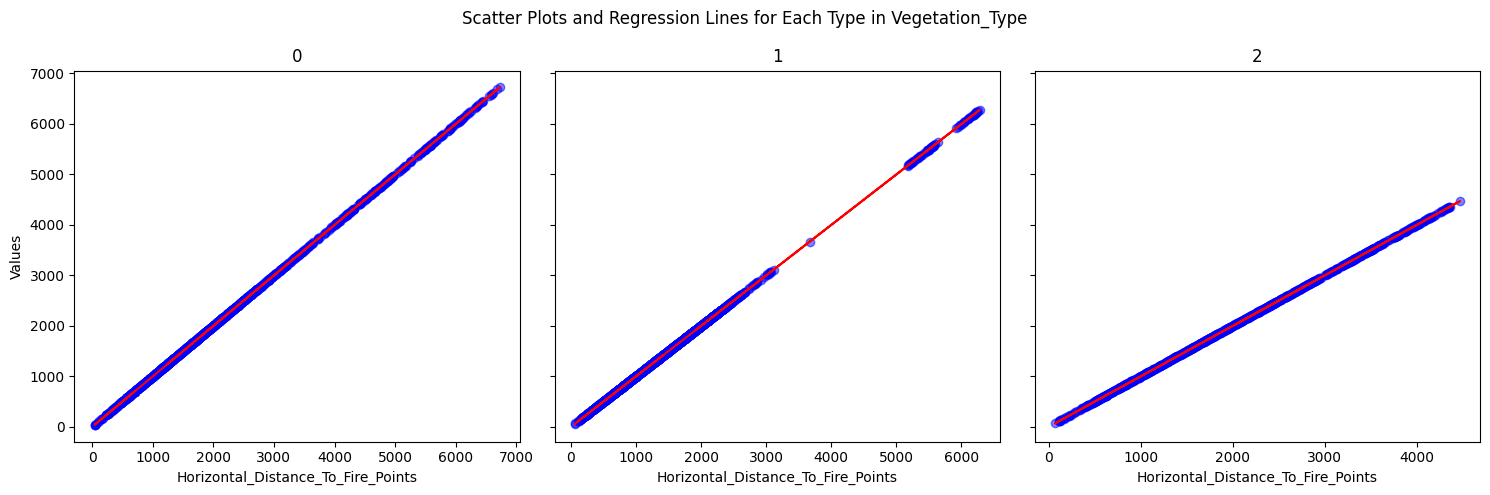

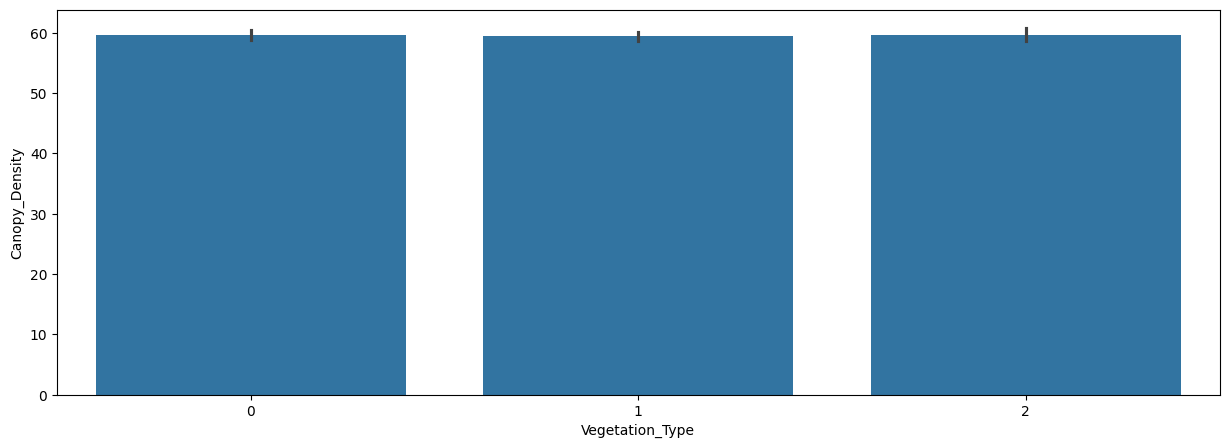

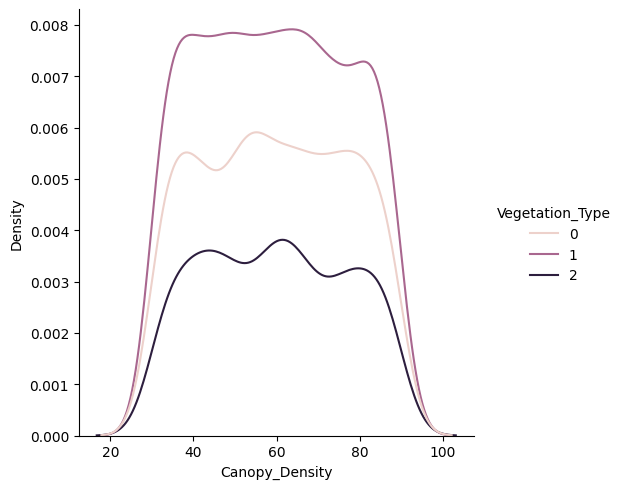

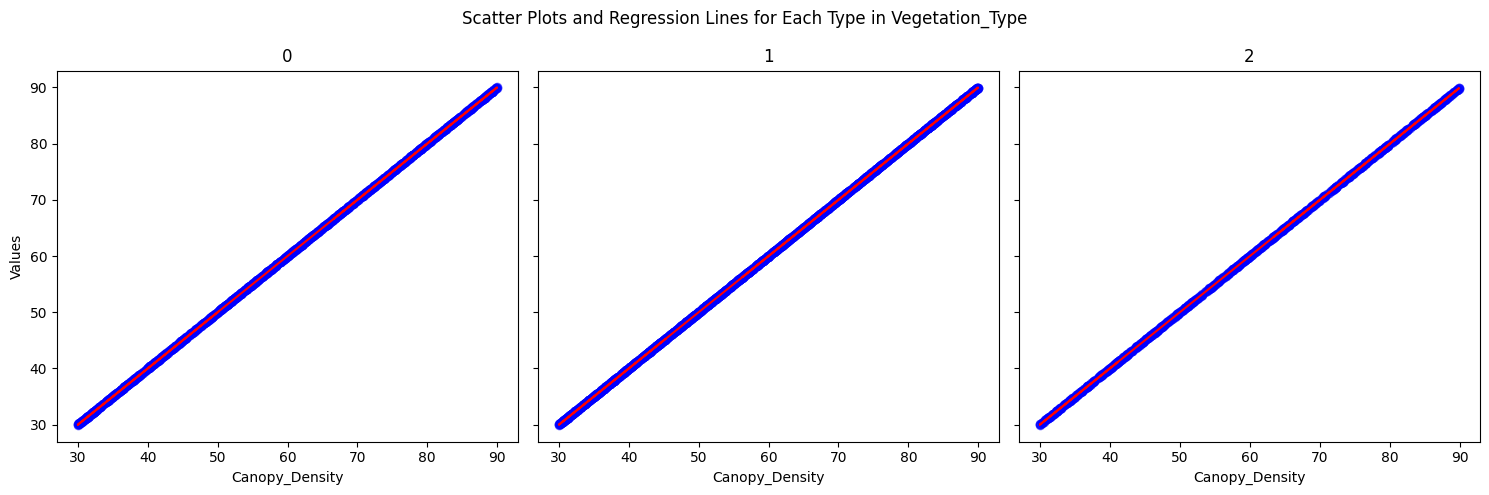

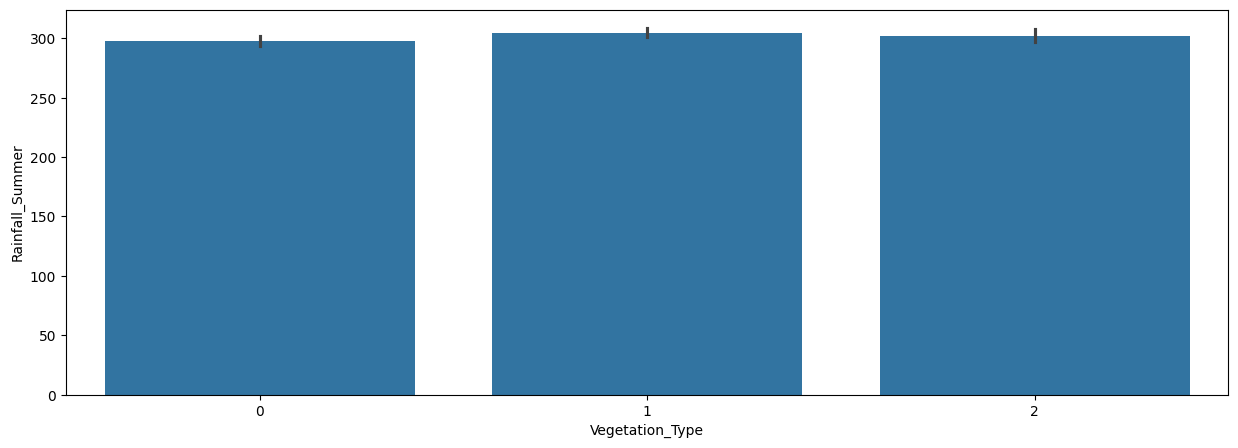

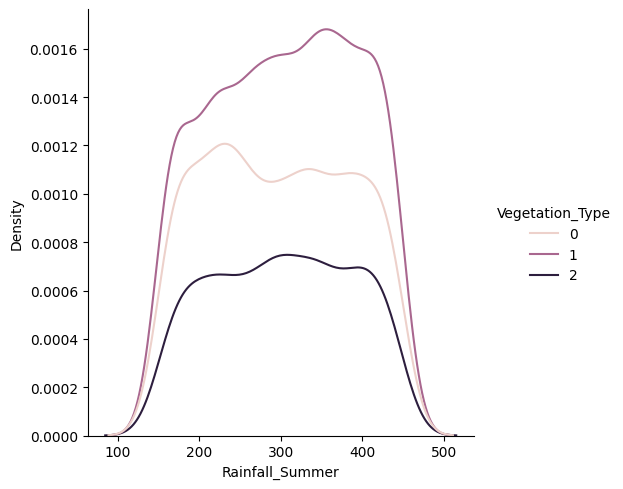

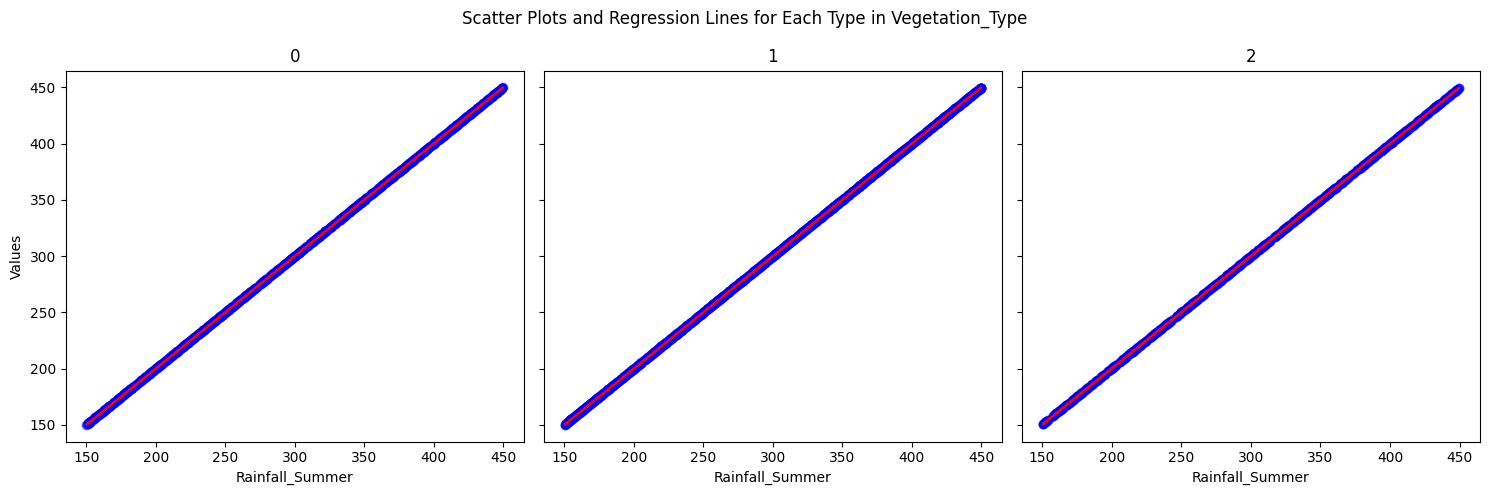

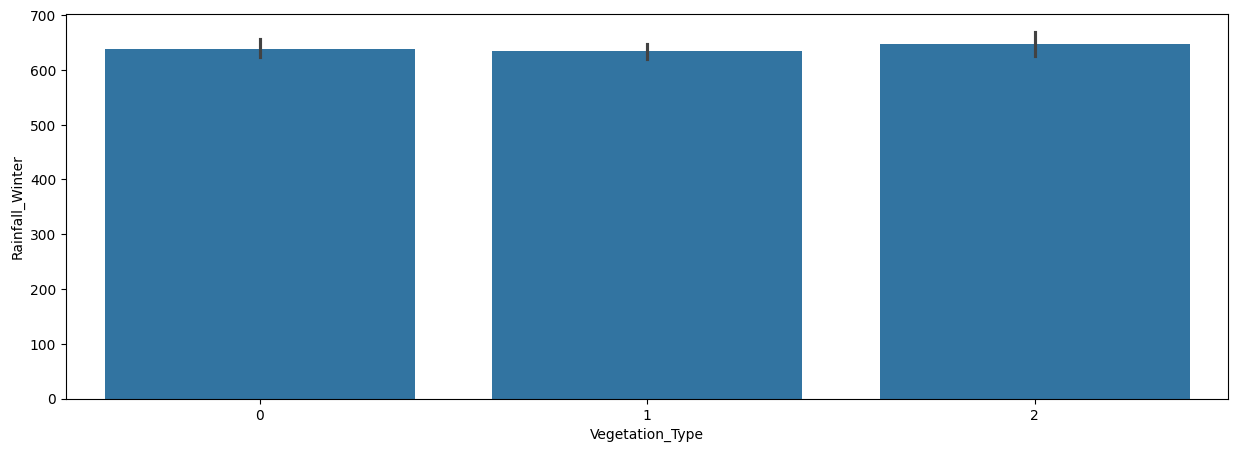

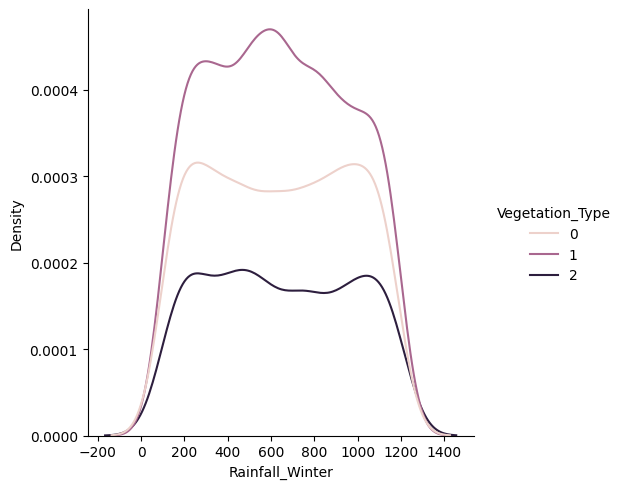

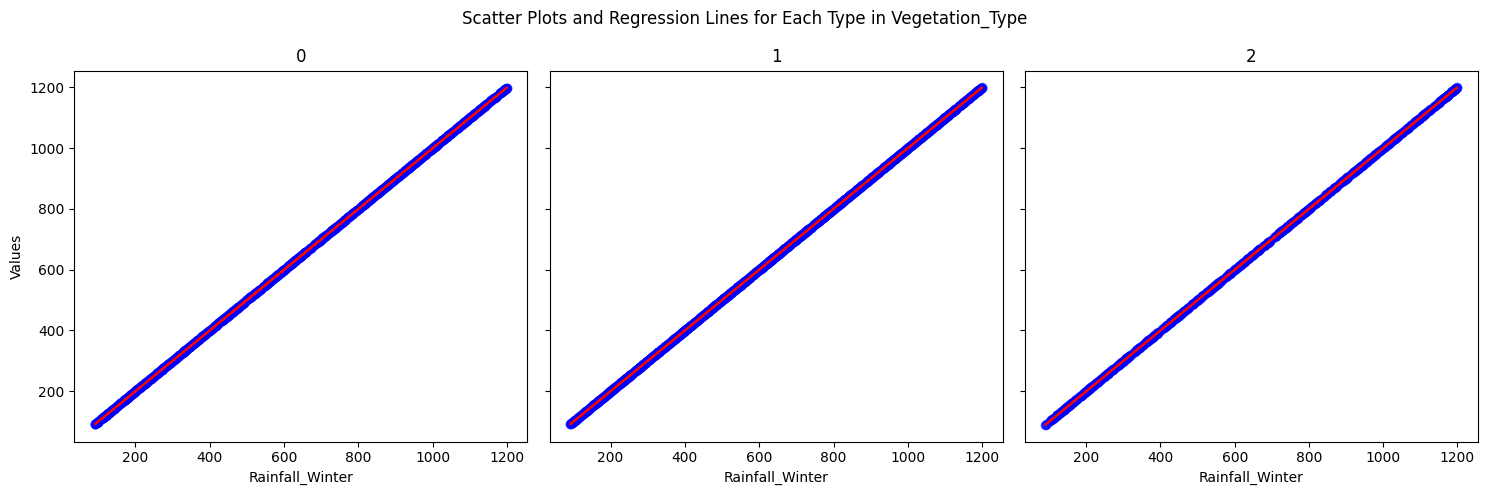

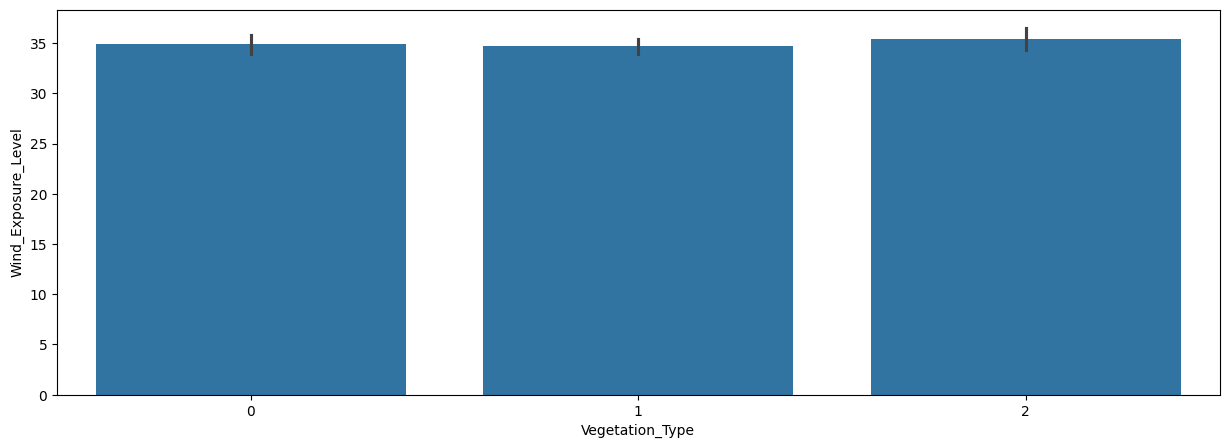

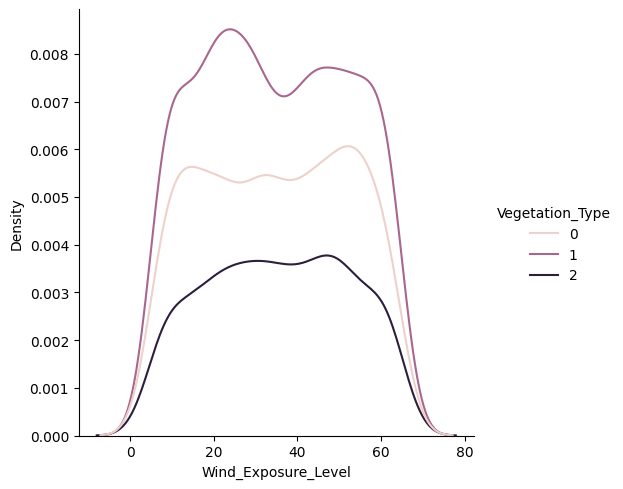

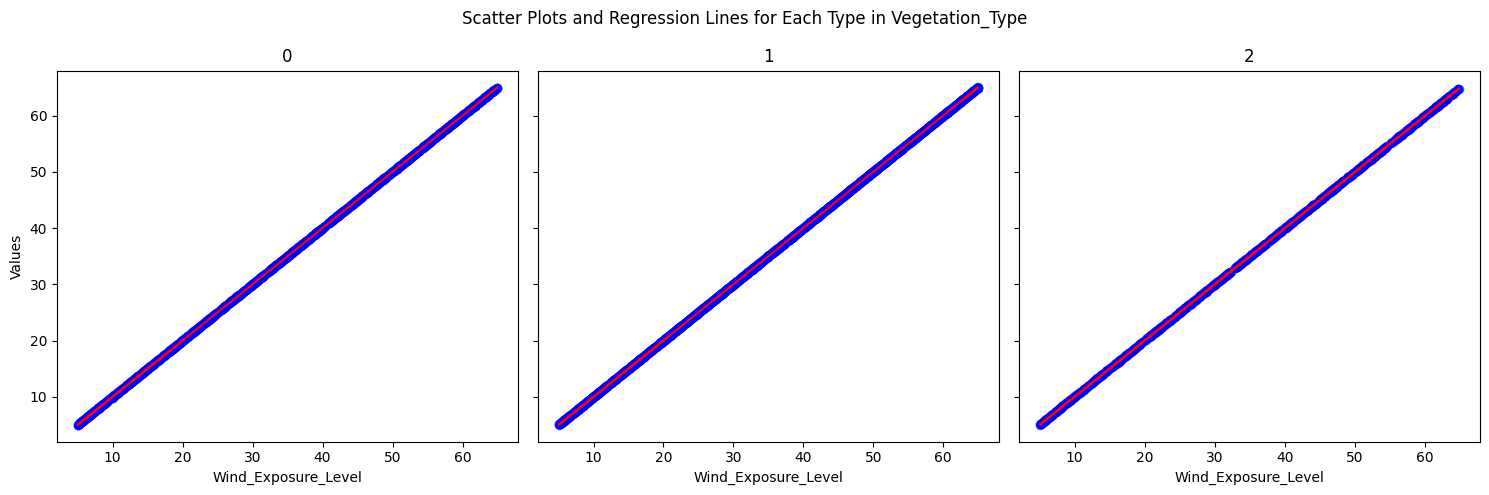

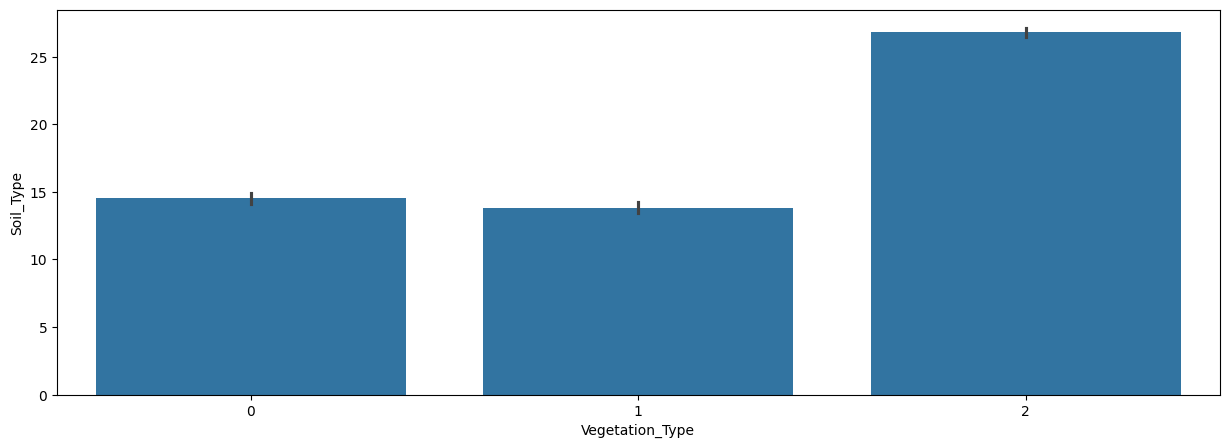

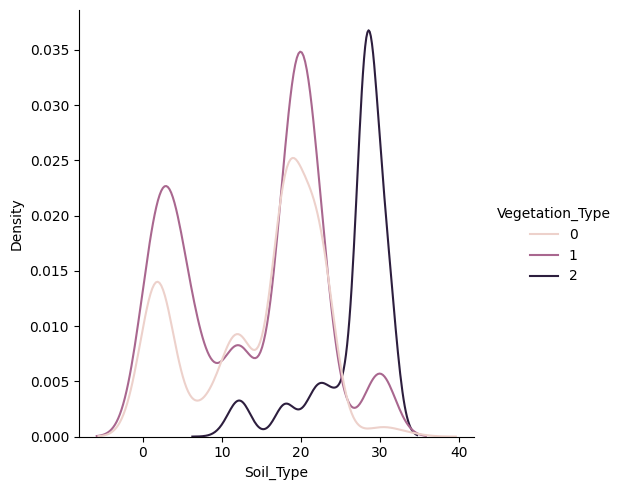

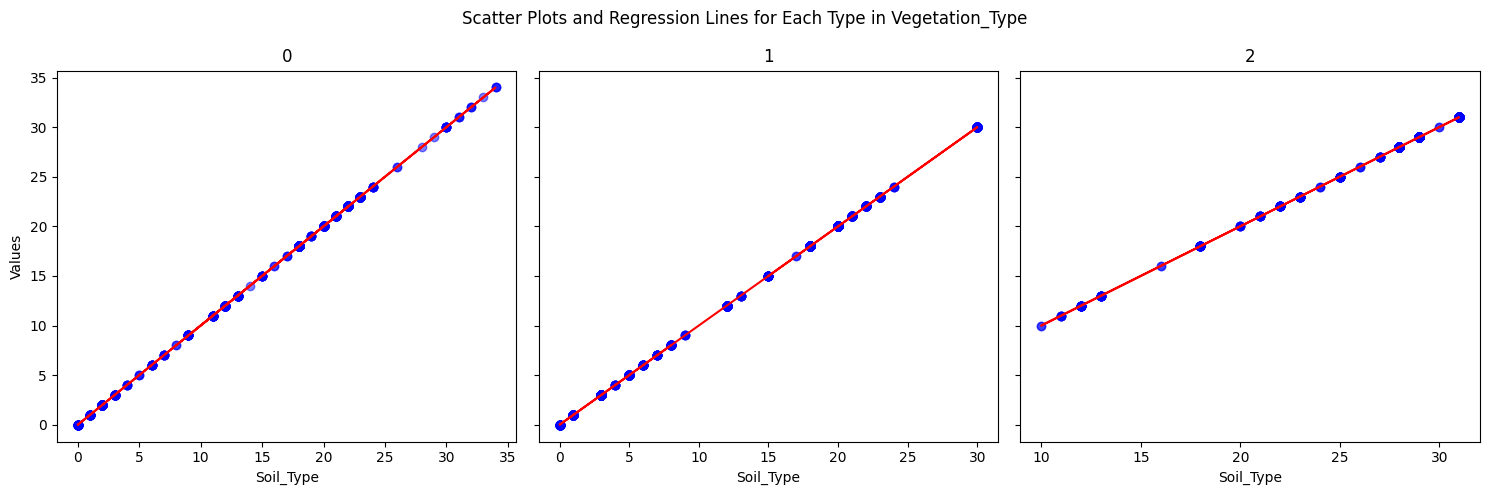

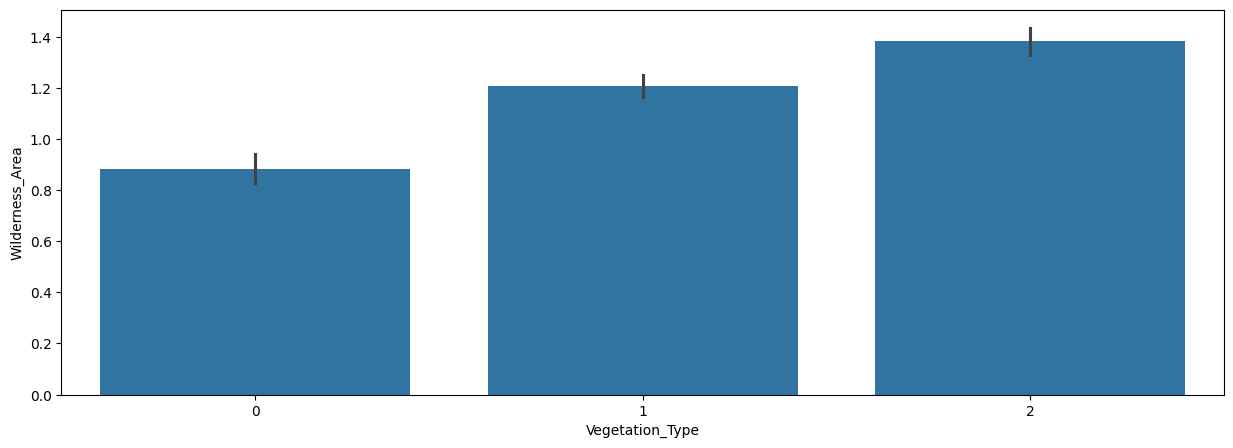

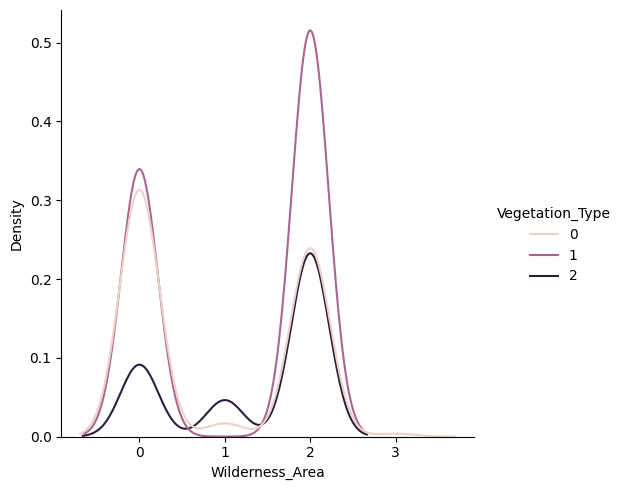

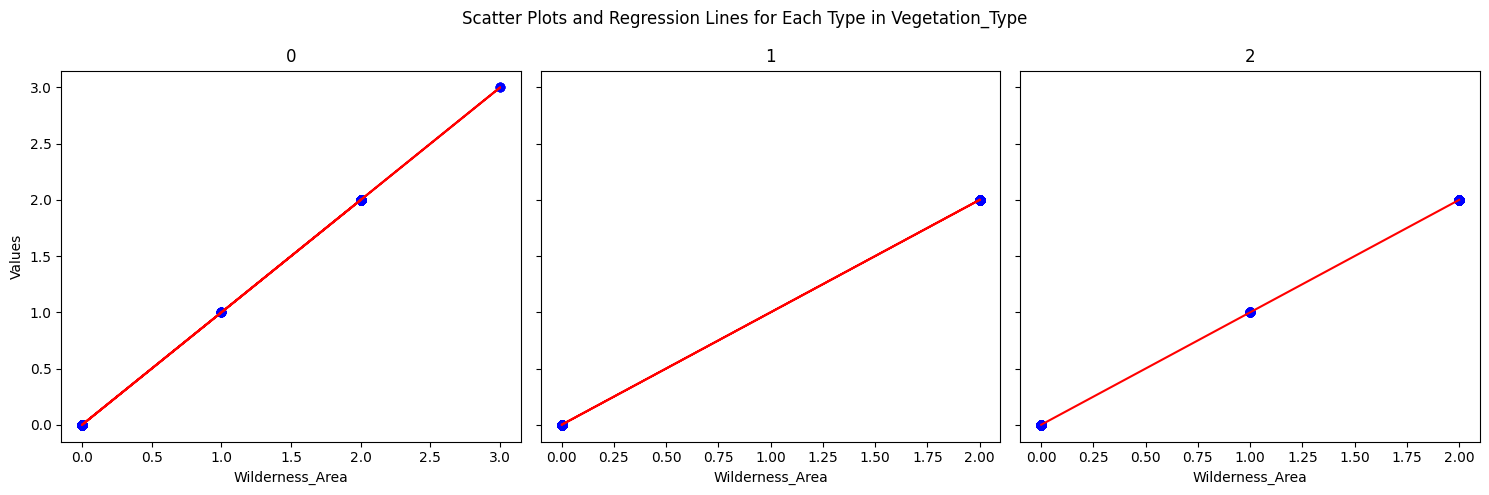

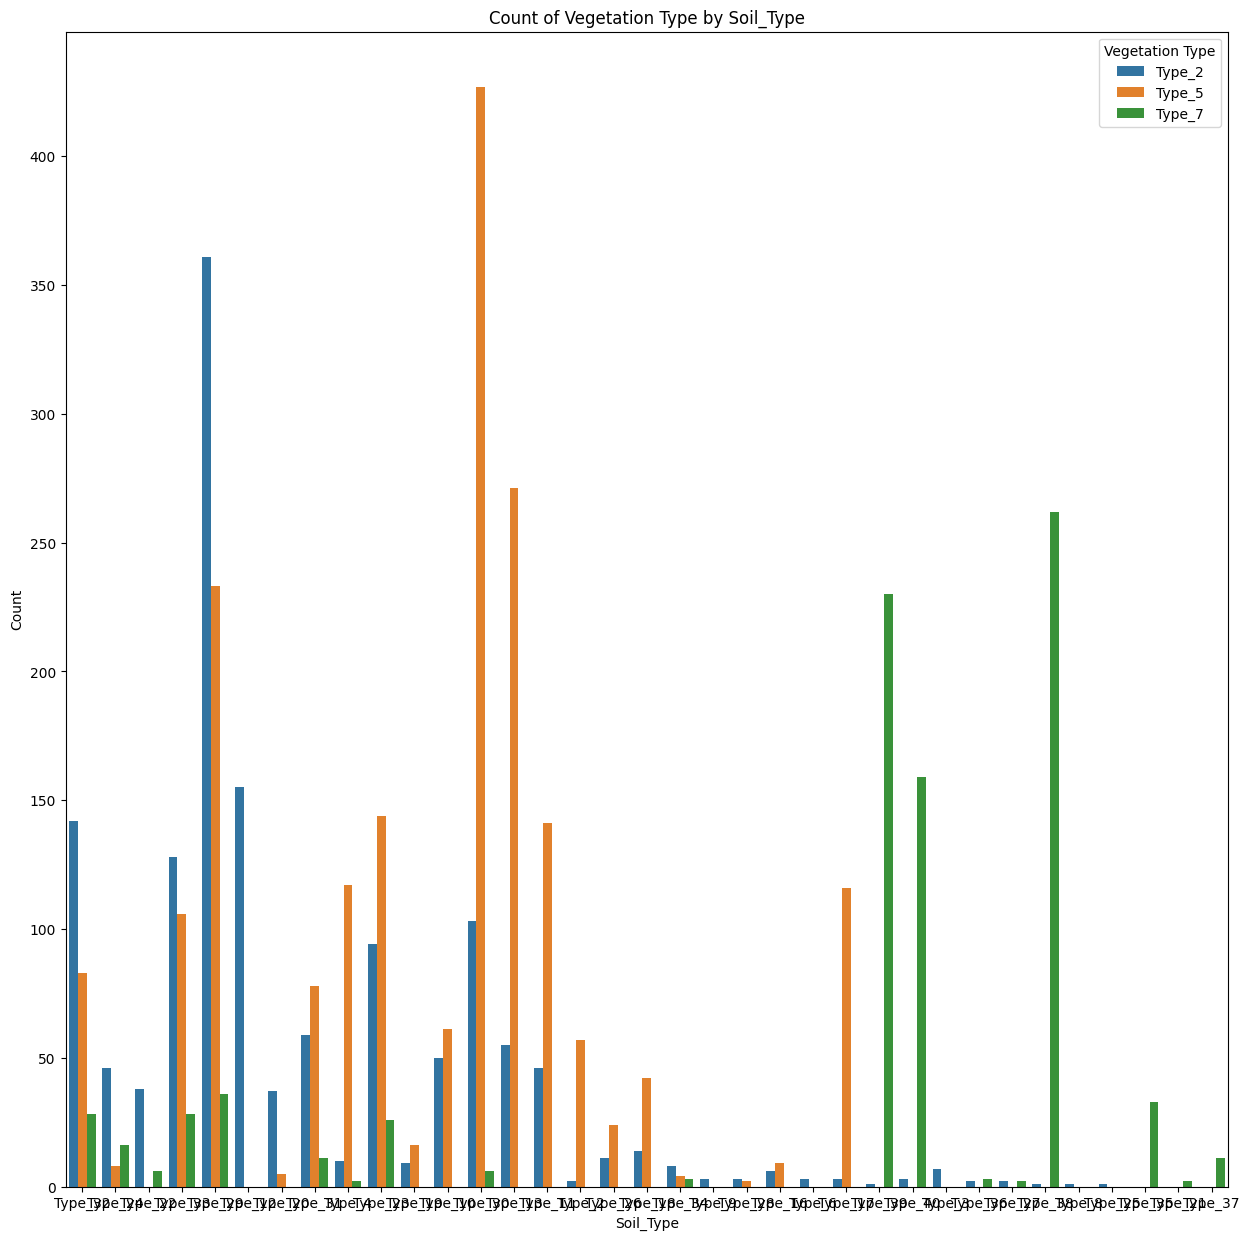

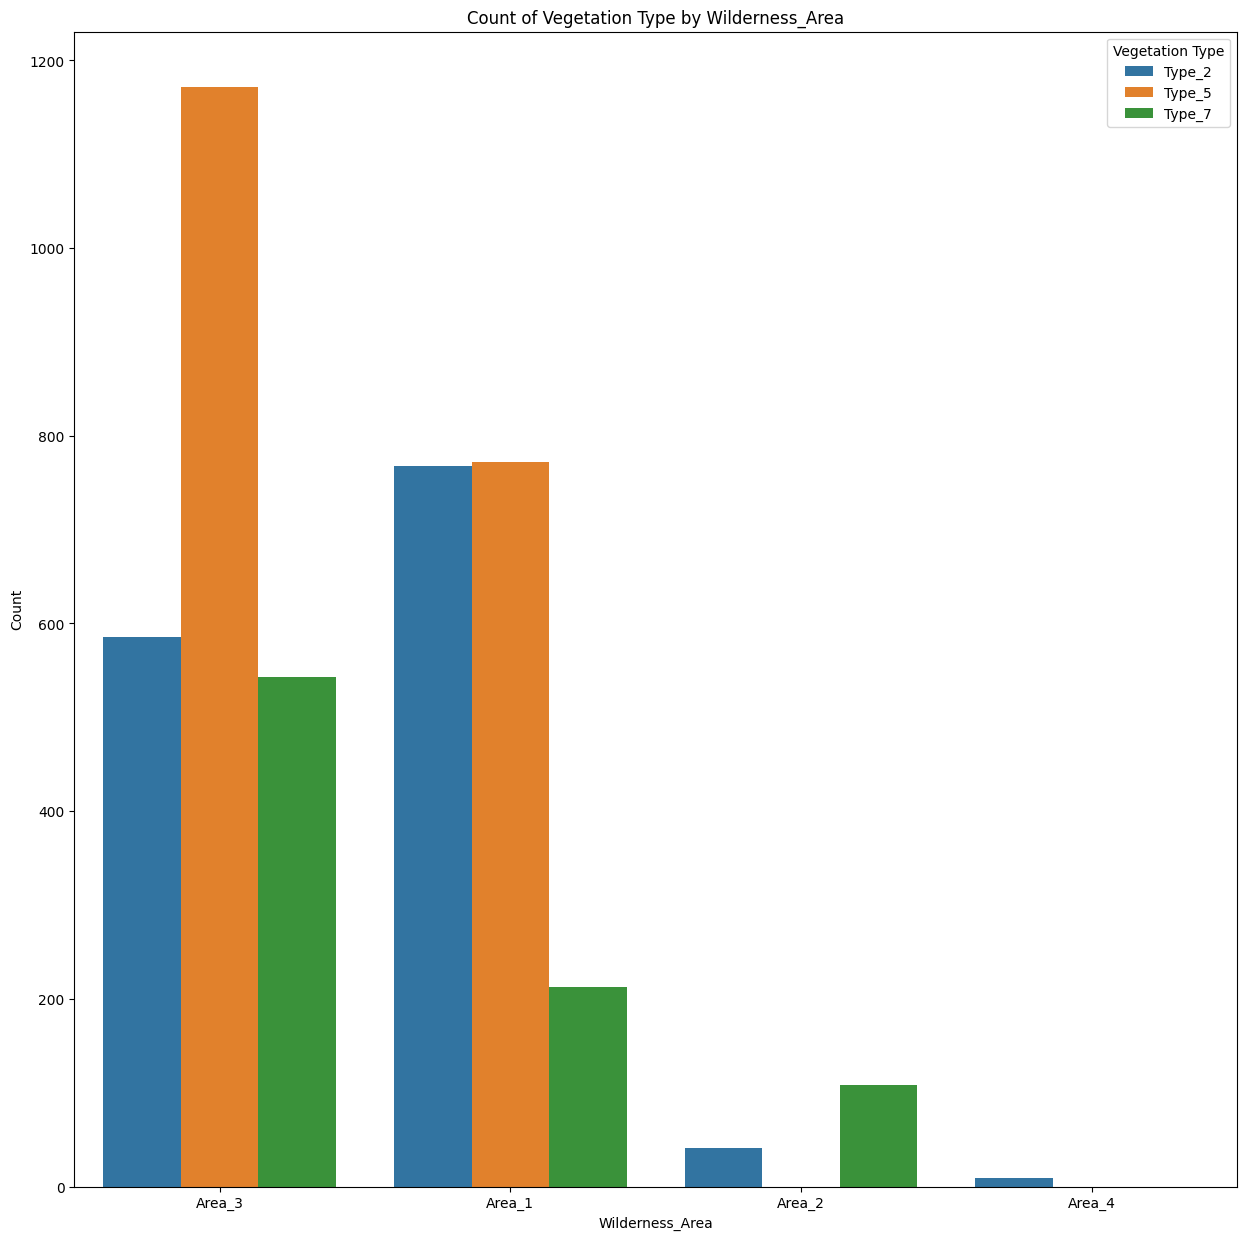


Covariance Matrix:


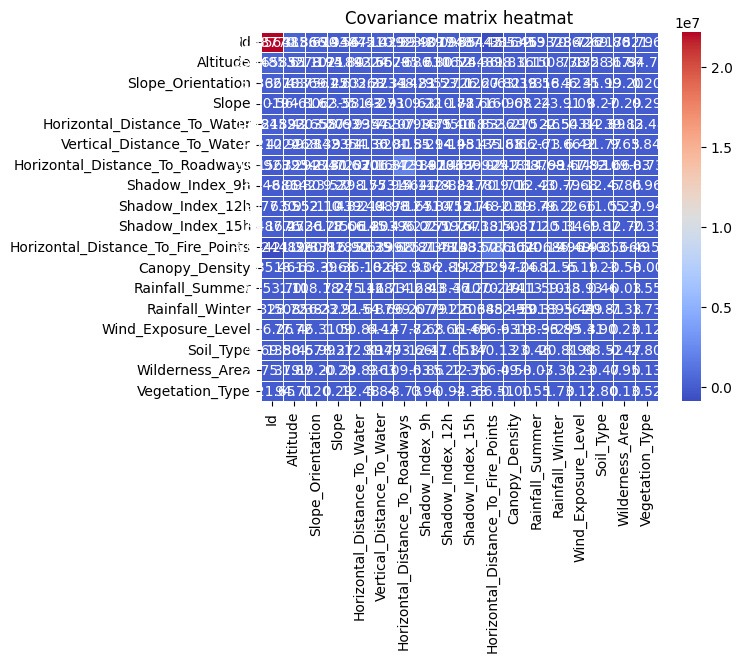


Correlation Matrix:


Text(0.5, 1.0, 'Correlation matrix heatmat')

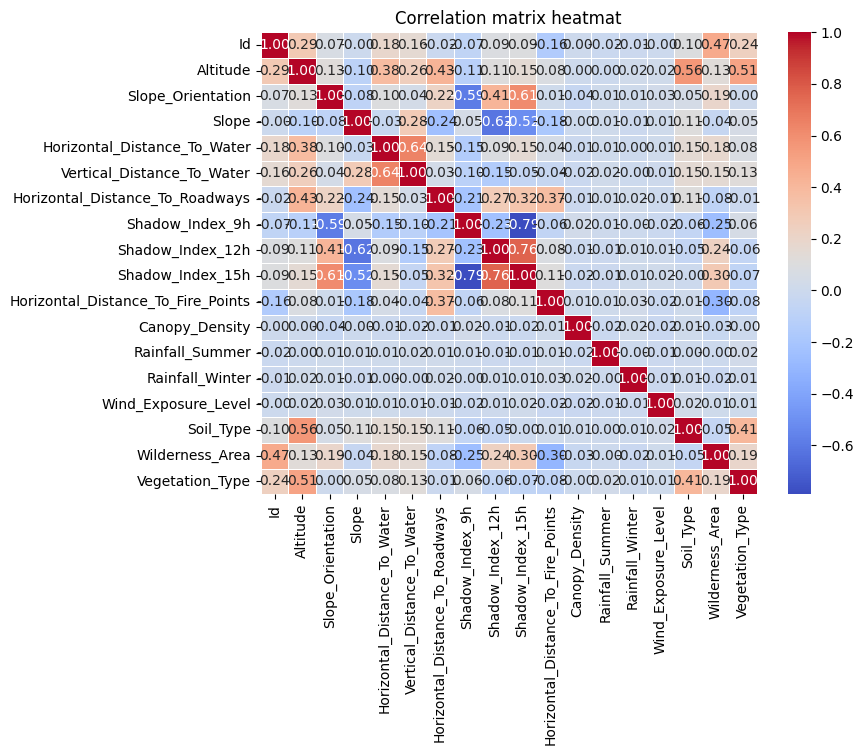

In [63]:
from sklearn.linear_model import LinearRegression

# Passo 2: Univariate Analysis (Distribution of individual features)
def bivariate_analysis(data, column_name):
    last_col = data.columns[-1]
    """with open(f'bivariate_analysis/bivariate_analysis_{column_name}.txt', 'w') as file:
        file.write(f'Bivariate Analysis for {column_name}\n')
        
        describe = data[column_name].describe()
        covariance = data[column_name].cov(data[last_col])
        correlation = data[column_name].corr(data[last_col])

        file.write(f'Describe: {describe}\n')
        file.write(f'Covariance: {covariance}\n')
        file.write(f'Correlation: {correlation}\n\n')"""


    # Visualization
    plt.figure(figsize=(15, 5))

    sns.barplot(data=dt, x=last_col, y=column_name)
   # plt.savefig(f'bivariate_analysis/bar_plot_{column_name}.png')

    sns.displot(data, x= column_name, hue=last_col, kind="kde")
    #plt.savefig(f'bivariate_analysis/dis_plot_kde_{column_name}.png')

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    # Get unique values in the last_col (your categorical variable)
    unique_types = data[last_col].unique()

   
   # Loop over each unique type and perform linear regression
    for i, t in enumerate(unique_types):
        # Filter data for the current type
        subset = data[data[last_col] == t]
        
        X = subset[column_name].values.reshape(-1, 1)
        y = subset[column_name].values
        model = LinearRegression()
        model.fit(X, y)
        
        m = model.coef_[0]
        b = model.intercept_
        
        axes[i].scatter(X, y, color='blue', alpha=0.5)
        
        axes[i].plot(X, model.predict(X), color='red', label=f'y = {m:.2f}x + {b:.2f}')
        
        # Set the title to show the current type and regression equation
        axes[i].set_title(f'{t}')
        axes[i].set_xlabel(column_name)

    # Set the common ylabel for the whole figure
    axes[0].set_ylabel('Values')

    # Display the plot
    plt.suptitle(f'Scatter Plots and Regression Lines for Each Type in {last_col}')
 

    plt.tight_layout()
    #plt.savefig(f'bivariate_analysis/scatter_plot_{column_name}.png')
    plt.show()



numerical_variables_to_analyze = [
    dc.ALTITUDE,
    dc.SLOPE_ORIENTATION,
    dc.SLOPE,
    dc.HORIZONTAL_DISTANCE_TO_WATER,
    dc.VERTICAL_DISTANCE_TO_WATER,
    dc.HORIZONTAL_DISTANCE_TO_ROADWAYS,
    dc.SHADOW_INDEX_9,
    dc.SHADOW_INDEX_12,
    dc.SHADOW_INDEX_15,
    dc.HORIZONTAL_DISTANCE_TO_FIRE_POINTS,
    dc.CANOPY_DENSITY,
    dc.RAINFALL_SUMMER,
    dc.RAINFALL_WINTER,
    dc.WIND_EXPOSURE_LEVEL,
    dc.SOIL_TYPE,
    dc.WILDERNESS_AREA,
  
]

Categorical_variables_to_analyze = [
    dc.SOIL_TYPE,
    dc.WILDERNESS_AREA,
]


# Realizar a análise bivariada para cada variável
for variable in numerical_variables_to_analyze:
    bivariate_analysis(dt, variable)


for variable in Categorical_variables_to_analyze:


   
    plt.figure(figsize=(15, 15))

    sns.countplot(data=bdt, x=variable, hue=dc.VEGETATION_TYPE)
    # Add labels and title
    plt.xlabel(f'{variable}')
    plt.ylabel('Count')
    plt.title('Count of Vegetation Type by 'f'{variable}')
    plt.legend(title='Vegetation Type')

   # plt.savefig(f'bivariate_analysis/Categorical_{variable}.png')

    plt.show()



#covariance Matrix
print("\nCovariance Matrix:")
cov_matrix=dt.cov()

sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Covariance matrix heatmat")

plt.show()


#correlataion matrix
print("\nCorrelation Matrix:")
corr_matrix=dt.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix heatmat")


In [211]:
# Holdout
#dtTraining = dt.drop(dc.VEGETATION_TYPE, axis=1)
dtTest = dt[dc.VEGETATION_TYPE]

X_train, X_test, Y_train, Y_test = train_test_split(dtTraining, dtTest, test_size=0.3, random_state=5)



print("------------------------------------------------------")
holdout_logisticRegression  = myRegression.logisticRegression(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_logisticRegressionOptimized =  myRegression.logisticRegressionOptimized(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_linearDiscriminantAnalysis = myRegression.linearDiscriminantAnalysis(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_linearDiscriminantAnalysisOptimized = myRegression.linearDiscriminantAnalysisOptimized(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_quadraticDiscriminantAnalysis = myRegression.quadraticDiscriminantAnalysis(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_quadraticDiscriminantAnalysisOptimized = myRegression.quadraticDiscriminantAnalysisOptimized(X_train, Y_train, X_test, Y_test)


------------------------------------------------------
Logistic Regression model accuracy on test data (in %): 80.85443037974683
------------------------------------------------------
Best parameters are:  {'regressor__C': 100}
Best score is:  0.8198825933066674
Logistic Regression model accuracy on test data (in %): 80.7753164556962
------------------------------------------------------
Linear Discriminant Analysis model accuracy on test data (in %): 81.25
------------------------------------------------------
Best parameters are:  {'regressor__shrinkage': 'auto', 'regressor__solver': 'lsqr'}
Best score is:  0.8076699951080546
Linear Discriminant Analysis model accuracy on test data (in %): 81.25
------------------------------------------------------
Quadratic Discriminant Analysis model accuracy on test data (in %): 81.0126582278481
------------------------------------------------------
Best parameters are:  {'regressor__reg_param': 0.0, 'regressor__tol': 0.0001}
Best score is:  0.82

In [212]:
# Cross Validation (k=5 and k=10)

#X = dt.drop(dc.VEGETATION_TYPE, axis=1)
Y = dt[dc.VEGETATION_TYPE]

print("---- Cross Validation Method ----")
crossValidation_logisticRegression5 = myRegression.crossValidation_logisticRegression(X,Y,5)
crossValidation_logisticRegression10 = myRegression.crossValidation_logisticRegression(X,Y,10)
print("------------------------------------------------------")
crossValidation_linearDiscriminantAnalysis5 = myRegression.crossValidation_linearDiscriminantAnalysis(X,Y,5)
crossValidation_linearDiscriminantAnalysis10 = myRegression.crossValidation_linearDiscriminantAnalysis(X,Y,10)
print("------------------------------------------------------")
crossValidation_quadraticDiscriminantAnalysis5 = myRegression.crossValidation_quadraticDiscriminantAnalysis(X,Y,5)
crossValidation_quadraticDiscriminantAnalysis10 = myRegression.crossValidation_quadraticDiscriminantAnalysis(X,Y,10)



---- Cross Validation Method ----
Logistic Regression model accuracy with 5-fold cross-validation (in %): 81.52917839522347
Logistic Regression model accuracy with 10-fold cross-validation (in %): 81.5762515338114
------------------------------------------------------
Linear Discriminant Analysis model accuracy with 5-fold cross-validation (in %): 80.88812999608344
Linear Discriminant Analysis model accuracy with 10-fold cross-validation (in %): 80.93509022751067
------------------------------------------------------
Quadratic Discriminant Analysis model accuracy with 5-fold cross-validation (in %): 82.55007706331027
Quadratic Discriminant Analysis model accuracy with 10-fold cross-validation (in %): 82.64485371097928


In [213]:
# Leave One Out Cross Validation (LOOCV)

print("---- Leave One Out Cross Validation Method ----")
leaveOneOutCrossValidation_logisticRegression = myRegression.leaveOneOutCrossValidation_logisticRegression(X,Y)
print("------------------------------------------------------")
leaveOneOutCrossValidation_linearDiscriminantAnalysis = myRegression.leaveOneOutCrossValidation_linearDiscriminantAnalysis(X,Y)
print("------------------------------------------------------")
leaveOneOutCrossValidation_quadraticDiscriminantAnalysis = myRegression.leaveOneOutCrossValidation_quadraticDiscriminantAnalysis(X,Y)


---- Leave One Out Cross Validation Method ----
Logistic Regression model accuracy with leave-one-out cross-validation (in %): 81.50522317188984
------------------------------------------------------
Linear Discriminant Analysis model accuracy with leave-one-out cross-validation (in %): 80.91168091168092
------------------------------------------------------
Quadratic Discriminant Analysis model accuracy with leave-one-out cross-validation (in %): 82.78727445394112


In [214]:
# Bootstrap

print("---- Bootstrap Resampling Method ----")
bootstrap_logisticRegression = myRegression.bootstrap_logisticRegression(X_train,Y_train,100)
print("------------------------------------------------------")
bootstrap_linearDiscriminantAnalysis = myRegression.bootstrap_linearDiscriminantAnalysis(X,Y,100)
print("------------------------------------------------------")
bootstrap_quadraticDiscriminantAnalysis = myRegression.bootstrap_quadraticDiscriminantAnalysis(X,Y,100)

---- Bootstrap Resampling Method ----
Bootstrap Mean Accuracy: 81.89%
------------------------------------------------------
Bootstrap Mean Accuracy: 80.96%
------------------------------------------------------
Bootstrap Mean Accuracy: 83.16%


In [215]:
# Função para comparar os resultados e identificar o melhor método para cada modelo
results = {
    'Logistic Regression': {
        'Holdout': holdout_logisticRegression,
        'Holdout Optimized': holdout_logisticRegressionOptimized,
        'Cross Validation (k=5)': crossValidation_logisticRegression5,
        'Cross Validation (k=10)': crossValidation_logisticRegression10,
        'LOOCV': leaveOneOutCrossValidation_logisticRegression,
        'Bootstrap': bootstrap_logisticRegression
    },
    'Linear Discriminant Analysis': {
        'Holdout': holdout_linearDiscriminantAnalysis,
        'Holdout Optimized': holdout_linearDiscriminantAnalysisOptimized,
        'Cross Validation (k=5)': crossValidation_linearDiscriminantAnalysis5,
        'Cross Validation (k=10)': crossValidation_linearDiscriminantAnalysis10,
        'LOOCV': leaveOneOutCrossValidation_linearDiscriminantAnalysis,
        'Bootstrap': bootstrap_linearDiscriminantAnalysis
    },
    'Quadratic Discriminant Analysis': {
        'Holdout': holdout_quadraticDiscriminantAnalysis,
        'Holdout Optimized': holdout_quadraticDiscriminantAnalysisOptimized,
        'Cross Validation (k=5)': crossValidation_quadraticDiscriminantAnalysis5,
        'Cross Validation (k=10)': crossValidation_quadraticDiscriminantAnalysis10,
        'LOOCV': leaveOneOutCrossValidation_quadraticDiscriminantAnalysis,
        'Bootstrap': bootstrap_quadraticDiscriminantAnalysis
    }
}

best_scores = {}

for model, methods in results.items():
    best_method = max(methods, key=methods.get)
    best_score = methods[best_method]
    best_scores[model] = (best_method, best_score)

for model, (method, score) in best_scores.items():
    print(f"Modelo: {model}")
    print(f"Melhor Método: {method}")
    print(f"Score: {score}")
    print("------------------------------------------------------")

Modelo: Logistic Regression
Melhor Método: Bootstrap
Score: 81.89450474898237
------------------------------------------------------
Modelo: Linear Discriminant Analysis
Melhor Método: Holdout
Score: 81.25
------------------------------------------------------
Modelo: Quadratic Discriminant Analysis
Melhor Método: Bootstrap
Score: 83.16286799620134
------------------------------------------------------


In [147]:
"""#Determine the best alpha for the algortihms
print("----------Ridge Regression best alpha------")
bestAlphaForRidgeRegression5=myRegression.ridgeCrossValidation(X, Y, 5)
bestAlphaForRidgeRegression10=myRegression.ridgeCrossValidation(X,Y,10)

print("--------Lasso Regression best alpha----------------------")
bestAlphaForLassoRegression5=myRegression.LassoCrossValidatiln(X, Y, 5)
bestAlphaForLassoRegression10=myRegression.LassoCrossValidatiln(X, Y, 10)

print("----------Elastic Net Regression best alpha----------")
bestAlphaForElasticNet5=myRegression.elasticNetValidation(X, Y, 5)
bestAlphaForElasticNet10=myRegression.elasticNetValidation(X, Y, 10)

"""


----------Ridge Regression best alpha------
Best alpha for Ridge regression: 1.0
Coeficient for Ridge regression: [ 2.86251236e-06  1.57052665e-03  4.41870513e-04 -2.42859165e-03
 -4.92498755e-04 -1.01003717e-04  2.61740138e-03 -1.88211564e-03
 -9.36862382e-04  1.44536439e-05  1.78561667e-04  1.13327705e-02
  1.27742202e-01]
Best alpha for Ridge regression: 10.0
Coeficient for Ridge regression: [ 2.90919915e-06  1.57073246e-03  4.41547386e-04 -2.41446058e-03
 -4.92304293e-04 -1.01046211e-04  2.62210318e-03 -1.88367080e-03
 -9.28572773e-04  1.43417020e-05  1.78750641e-04  1.13236514e-02
  1.27148297e-01]
--------Lasso Regression best alpha----------------------
Best alpha for Lasso regression: 0.1
Coeficient for Lasso regression: [ 1.25179268e-05  1.65679090e-03  2.97146331e-04 -0.00000000e+00
 -4.55189136e-04 -1.11627260e-04  9.03541784e-04 -0.00000000e+00
 -1.10551755e-03 -9.29998537e-06  0.00000000e+00  7.70858472e-03
  0.00000000e+00]
Best alpha for Lasso regression: 0.1
Coeficient 

In [148]:
"""print("-----best alpha with grid search Ridge----")
BestAlphaWithGridForRidge5=myRegression.gridSearchRidge(X, Y, 5)
BestAlphaWithGridForRidge10=myRegression.gridSearchRidge(X, Y, 10)
print("-----best alpha with grid search Lasso----")
BestAlphaWithGridForLasso5=myRegression.gridSearchLasso(X, Y, 5)
BestAlphaWithGridForLasso10=myRegression.gridSearchLasso(X, Y, 10)
print("-----best alpha with grid search Elastic Net----")
BestAlphaWithGridForElasticNet5=myRegression.gridSearchElasticNet(X, Y, 5)
BestAlphaWithGridForElasticNet10=myRegression.gridSearchElasticNet(X, Y, 10)"""

-----best alpha with grid search Ridge----
Best alpha with Grid search is: 2.023589647725158
Best alpha with Grid search is: 14.563484775012444
-----best alpha with grid search Lasso----
Best alpha with Grid search is: 0.001
Best alpha with Grid search is: 0.001
-----best alpha with grid search Elastic Net----
Best alpha with Grid search is: 0.0013257113655901094
Best alpha with Grid search is: 0.0013257113655901094


In [ ]:
CforLogistic=myRegression.bestCforLogictic(X, Y, 5)
CforLogistic2=myRegression.bestCforLogictic(X, Y, 10)

C:\Users\Vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: Conve

   param_C  mean_test_score  rank_test_score
0    0.001         0.737907                1
1    0.010         0.737610                2
2    0.100         0.737610                2
3    1.000         0.737610                2
4   10.000         0.737610                2
5  100.000         0.737610                2


C:\Users\Vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: Conve

   param_C  mean_test_score  rank_test_score
5  100.000         0.739386                1
4   10.000         0.739386                1
0    0.001         0.739089                3
1    0.010         0.739089                3
3    1.000         0.739089                3
2    0.100         0.739089                3


C:\Users\Vasco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [193]:
Ridge_logisticRegression=myRegression.logisticRegressionRidgeLasso(X, Y, 'l1', 0.1)
lasso_logisticRegression=myRegression.logisticRegressionRidgeLasso(X, Y, 'l2', 0.1)

ElasticNetl1=myRegression.logisticRegressionElastic(X, Y, 0.5, 0.1)
ElasticNetl1=myRegression.logisticRegressionElastic(X, Y, 0.3, 0.1)

Logistic Regression model accuracy on test data (in %): 79.00355871886121
Coefficients: [[ 0.02839467  0.          0.         -0.18562335  0.34413139  0.
   0.07931527 -0.26724478  0.          0.09041929  0.          0.
  -0.04327995 -0.0161334   0.         -0.05804884 -0.10672123]
 [ 0.         -1.58552338  0.30129097  0.05391879  0.          0.24525787
  -0.23556901  0.22601208  0.09598327  0.         -0.38810283  0.
   0.          0.         -0.01565719  0.          0.25528026]
 [ 0.          4.82542179  0.          0.         -0.14766299  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.1953677   0.        ]]
Logistic Regression model accuracy on test data (in %): 78.64768683274022
Coefficients: [[ 4.59214714e-02 -7.04682064e-01 -1.45494480e-01 -7.15398931e-02
   2.99644472e-01 -1.19071592e-01  1.38655646e-01 -1.66883561e-01
  -6.52630132e-02  2.32332514e-01  1.11653940e-01 -6.95086455e-03
  -2.96460893e-02 -2.30894997e-0

In [206]:
X = dt.drop([dc.VEGETATION_TYPE, dc.CANOPY_DENSITY, dc.RAINFALL_SUMMER, dc.RAINFALL_WINTER, dc.VERTICAL_DISTANCE_TO_WATER], axis=1)
dtTraining =dt.drop([dc.VEGETATION_TYPE, dc.CANOPY_DENSITY, dc.RAINFALL_SUMMER, dc.RAINFALL_WINTER, dc.VERTICAL_DISTANCE_TO_WATER], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(dtTraining, dtTest, test_size=0.3, random_state=5)

X

Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0     14537      3166                198      6                           192   
1      1154      2877                342     13                           450   
2     14507      3103                 48      7                             0   
3      7196      2950                269     39                           450   
4      1801      2868                332     17                            60   
...     ...       ...                ...    ...                           ...   
4207   8078      3319                195     11                             0   
4208   7815      3379                340     13                           911   
4209   9482      3300                  5     11                           488   
4210  14428      3431                180     11                           443   
4211   2113      3266                 67     14                            67   

      Horizontal_Distance_To_Roadways  Shadow_Index_9h  Shadow_Index_12h  \
0                                3137              218               245   
1                                 618              193               220   
2                                1034              223               225   
3                                1528               95               221   
4                                1718              177               215   
...                               ...              ...               ...   
4207                             2666              218               250   
4208                             1216              192               221   
4209                             2758              205               218   
4210                             4198              224               247   
4211                             2300              233               211   

      Shadow_Index_15h  Horizontal_Distance_To_Fire_Points  \
0                  163                                1253   
1                  166                                2285   
2                  137                                2070   
3                  248                                1595   
4                  176                                2613   
...                ...                                 ...   
4207               165                                 541   
4208               167                                1914   
4209               149                                2287   
4210               154                                3131   
4211               107                                2805   

      Wind_Exposure_Level  Soil_Type  Wilderness_Area  
0                   19.95         22                2  
1                   12.01         13                0  
2                   48.18         11                0  
3                   54.54         23                2  
4                   62.79         23                2  
...                   ...        ...              ...  
4207                39.75         28                2  
4208                55.54         28                2  
4209                31.72         28                2  
4210                29.51         23                2  
4211                28.71         29                0  

[4212 rows x 13 columns]

In [207]:
cvlogisticnewlassso=myRegression.crossValidation_logisticRegressionWithLasso(X,Y, 5,'l1', 0.1)
cvlogisticnewridge=myRegression.crossValidation_logisticRegressionWithLasso(X,Y, 10,'l1', 0.1)


Logistic Regression model accuracy with 5-fold cross-validation (in %): 81.60049365601306
Logistic Regression model accuracy with 10-fold cross-validation (in %): 81.52874559556909


In [208]:
bootstrap_logisticLasso=myRegression.bootstrap_logisticRegressionRegularization(X_train,Y_train,100, 'l1', 0.1)
bootstrap_logisticReg=myRegression.bootstrap_logisticRegressionRegularization(X_train,Y_train,100, 'l2', 0.1)

Bootstrap Mean Accuracy: 81.78%
Bootstrap Mean Accuracy: 81.38%


In [209]:
holdout_logisticLasso=myRegression.logisticRegressionRegularization(X_train, Y_train, X_test, Y_test, 'l1', 0.1)
holdout_logisticReg=myRegression.logisticRegressionRegularization(X_train, Y_train, X_test, Y_test, 'l2', 0.1)



Logistic Regression model accuracy on test data (in %): 80.69620253164557
Logistic Regression model accuracy on test data (in %): 80.45886075949366


In [210]:
loo_loologistiLasso=myRegression.leaveOneOutCrossValidation_logisticRegressionRegularization(X, Y, 'l1', 0.1)
loo_loologisticReg=myRegression.leaveOneOutCrossValidation_logisticRegressionRegularization(X, Y, 'l2', 0.1)

Logistic Regression model accuracy with leave-one-out cross-validation (in %): 81.5289648622982
Logistic Regression model accuracy with leave-one-out cross-validation (in %): 81.29154795821462
